# Project 2: Multiple Linear Regression On Housing Data (King County, WA)

In [1]:
from IPython.display import Image
#Image(url= "https://upload.wikimedia.org/wikipedia/commons/thumb/2/23/Space_Needle_2011-07-04.jpg/1200px-Space_Needle_2011-07-04.jpg", width=400, height=400)
Image(url= "images/1200px-Space_Needle_2011-07-04.jpg", width=400, height=400)

## Final Project Submission

Please fill out:
* Student name: Eric Hansen
* Student pace: self paced / part time / full time --- Self Paced
* Scheduled project review date/time: 9/7/21 6:30 EST
* Instructor name: Jeff Herman
* Blog post URL: https://ericthansen.medium.com/linear-regression-and-assumption-validity-94712f714ea4


# Introduction and assumptions  
In this project, we are given agency to assume our stakeholder (e.g. house sellers, buyers, real estate agents, flippers, etc.)  
For most, if not all, of these parties, it seems likely that 'price' will be a desirable target variable.  

For this project, we will postulate that our stakeholder is a family looking to sell their house in the Seattle area, and potentially relocate to another house in the area.  

Our data source (King's County, WA home sale price) contains price (target variable) for sold houses in 2014-2015, along with a plethora of other potential predictor variables.
Therefore, our data source is a viable tool to inform choices about house purchase/sale.

Relevant questions might be:  
- What modifications can be made to their home to increase price?
- What characteristics could be desirably low to get a good deal on the future house?
- What is a good time to buy/sell?  I.e. are there months or days of the week that work better?

In general, I will aim to use the OSEMN framework, though due to the iterative nature, some steps blend into each other.
- Obtain
- Scrub
- Explore
- Model
- INterpret

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.impute import MissingIndicator
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
#from sklearn import metrics
import sklearn.metrics as metrics


from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from statsmodels.api import OLS
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.stats.api as sms
import scipy.stats as stats


from random import randrange, randint

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import numpy as np

import pandas as pd
pd.get_option("display.max_columns")
# settings to display all columns
pd.set_option("display.max_columns", None)
# display the dataframe head


verbose = True

In [3]:
df = pd.read_csv('data/kc_house_data.csv')
if verbose:
    display(df.head())



id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0         NaN   0.0          3      7        1180   
1      7242     2.0         0.0   0.0          3      7        2170   
2     10000     1.0         0.0   0.0          3      6         770   
3      5000     1.0         0.0   0.0          5      7        1050   
4      8080     1.0         0.0   0.0          3      8        1680   

  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0           0.0      1955           0.0    98178  47.5112 -122.257   
1         400.0      1951        1991.0    98125  47.7210 -122.319   
2           0.0      1933           NaN    98028  47.7379 -122.233   
3         910.0      1965           0.0    98136  47.5208 -122.393   
4           0.0      1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

# Column Names and descriptions for King County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


Data understanding - the description for view is especially vague; we'd like more detail on all of these that are relevant to saleprice, but can explore that as additional step.

In [4]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

There are some na values that need to be cleaned.

In [5]:
df.describe().transpose()

count          mean           std           min  \
id             21597.0  4.580474e+09  2.876736e+09  1.000102e+06   
price          21597.0  5.402966e+05  3.673681e+05  7.800000e+04   
bedrooms       21597.0  3.373200e+00  9.262989e-01  1.000000e+00   
bathrooms      21597.0  2.115826e+00  7.689843e-01  5.000000e-01   
sqft_living    21597.0  2.080322e+03  9.181061e+02  3.700000e+02   
sqft_lot       21597.0  1.509941e+04  4.141264e+04  5.200000e+02   
floors         21597.0  1.494096e+00  5.396828e-01  1.000000e+00   
waterfront     19221.0  7.595859e-03  8.682485e-02  0.000000e+00   
view           21534.0  2.338627e-01  7.656862e-01  0.000000e+00   
condition      21597.0  3.409825e+00  6.505456e-01  1.000000e+00   
grade          21597.0  7.657915e+00  1.173200e+00  3.000000e+00   
sqft_above     21597.0  1.788597e+03  8.277598e+02  3.700000e+02   
yr_built       21597.0  1.971000e+03  2.937523e+01  1.900000e+03   
yr_renovated   17755.0  8.363678e+01  3.999464e+02  0.000000e+00   
zipcode        21597.0  9.807795e+04  5.351307e+01  9.800100e+04   
lat            21597.0  4.756009e+01  1.385518e-01  4.715590e+01   
long           21597.0 -1.222140e+02  1.407235e-01 -1.225190e+02   
sqft_living15  21597.0  1.986620e+03  6.852305e+02  3.990000e+02   
sqft_lot15     21597.0  1.275828e+04  2.727444e+04  6.510000e+02   

                        25%           50%           75%           max  
id             2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price          3.220000e+05  4.500000e+05  6.450000e+05  7.700000e+06  
bedrooms       3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.430000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
sqft_lot       5.040000e+03  7.618000e+03  1.068500e+04  1.651359e+06  
floors         1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
yr_built       1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated   0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode        9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat            4.747110e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long          -1.223280e+02 -1.222310e+02 -1.221250e+02 -1.213150e+02  
sqft_living15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
sqft_lot15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05

Note that "long" is negative and several have min value of 0 - be careful for log transformation.

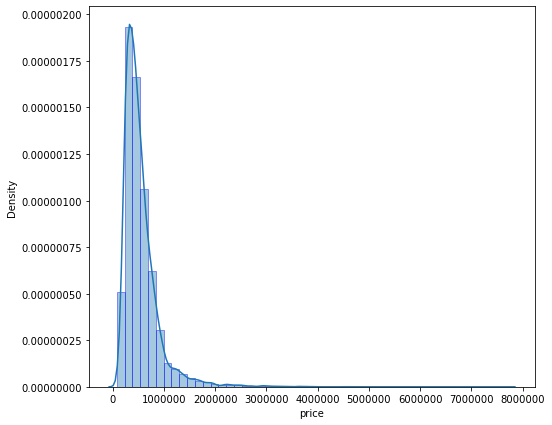

In [6]:
# Price distribution

plt.figure(figsize=(8, 7))
sns.distplot(df['price'], bins=50, hist_kws=dict(edgecolor="blue", linewidth=1))

plt.ticklabel_format(style='plain')

# Outliers  
For our "client", we aren't interested in exceedingly high-value homes anyway, and these outliers could disrupt other trends.  
So, we will just remove them now.


In [7]:
for i in range(90, 100):
    q = i / 100
    print('{} percentile: {}'.format(q, df['price'].quantile(q=q)))
outlier_cutoff = 2 * 10**6
#remove the outliers!  This is worth returning to
subset = df[df['price'] < outlier_cutoff]
print('Percent removed for subset:',(len(df) - len(subset))/len(df))

df = subset

0.9 percentile: 887000.0
0.91 percentile: 919993.6
0.92 percentile: 950000.0
0.93 percentile: 997964.0000000002
0.94 percentile: 1060000.0
0.95 percentile: 1160000.0
0.96 percentile: 1260000.0
0.97 percentile: 1390000.0
0.98 percentile: 1600000.0
0.99 percentile: 1970000.0
Percent removed for subset: 0.009630967263971849


In [8]:
#Similarly, let's check on low outliers

for i in range(0, 10):
    q = i / 100
    print('{} percentile: {}'.format(q, df['price'].quantile(q=q)))
#those low value homes are valid, and in significant enough proportion that they shouldn't be removed

0.0 percentile: 78000.0
0.01 percentile: 153502.64
0.02 percentile: 175000.0
0.03 percentile: 191000.0
0.04 percentile: 202000.0
0.05 percentile: 210000.0
0.06 percentile: 219900.0
0.07 percentile: 225032.80000000002
0.08 percentile: 233000.0
0.09 percentile: 240000.0


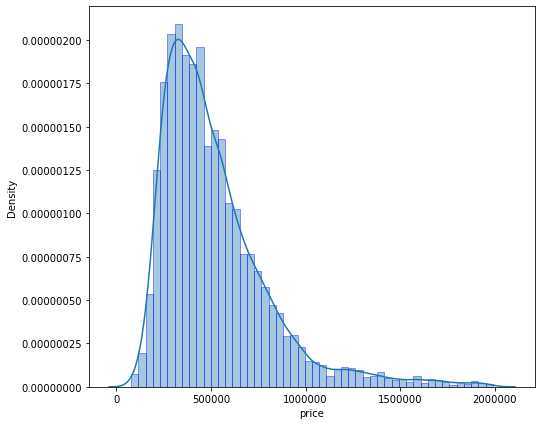

In [9]:
#After outliers removed: 
# Price distribution

plt.figure(figsize=(8, 7))
sns.distplot(subset['price'], bins=50, hist_kws=dict(edgecolor="blue", linewidth=1))

plt.ticklabel_format(style='plain')

This price graph looks a lot more normal.  We could potentially even remove more.

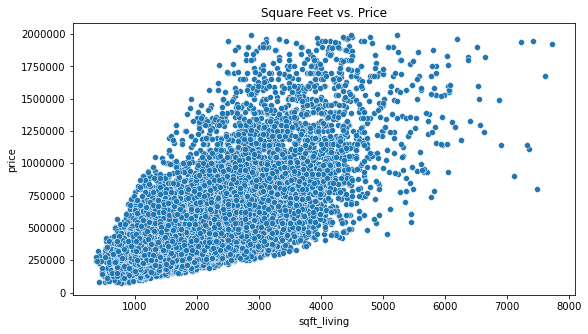

In [10]:
#A quick look at sqft vs price
plt.figure(figsize=(9, 5))
sns.scatterplot(x='sqft_living', y='price', data=df).set_title('Square Feet vs. Price')
plt.ticklabel_format(style='plain')#style='plain', 'sci', 'scientific'


Certainly there is a positive correlation.

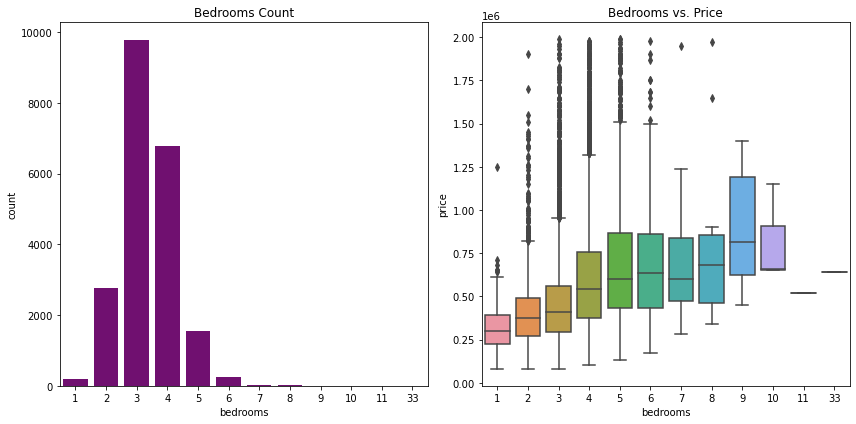

In [11]:
#Investigating bedrooms vs price

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].set_title('Bedrooms Count')
sns.countplot(df['bedrooms'], ax=axes[0], color='purple')

axes[1].set_title('Bedrooms vs. Price')
sns.boxplot(x='bedrooms', y='price', data=df, ax=axes[1])

plt.tight_layout()

In [12]:
# That 33 bedroom house for 750K?  No way.  Probably error.  Let's drop it.  The 11 bedroom is also probably wrong, but it's
#less egregious, so perhaps leave it.
df = df.drop(df[df['bedrooms'] == 33].index)


Positive correlation here as well, though lots of outliers.  

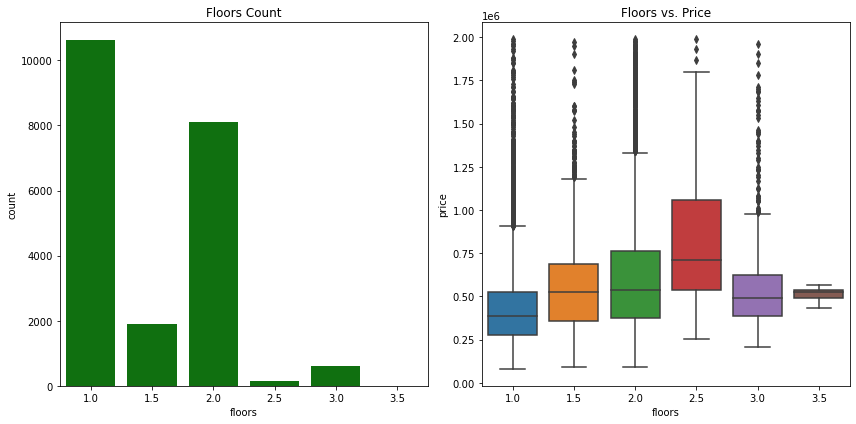

In [13]:
# floors vs price

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].set_title('Floors Count')
sns.countplot(df['floors'], ax=axes[0], color='green')

axes[1].set_title('Floors vs. Price')
sns.boxplot(x='floors', y='price', data=df, ax=axes[1])

plt.tight_layout()

Surprisingly not an overwhelming increase on homes with 3 floors - there are other more important characteristics, it seems.  May have linearity issue here.

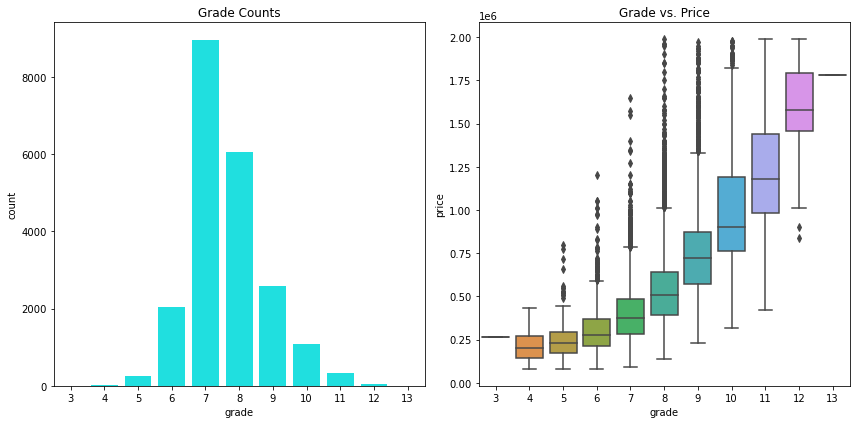

In [14]:
# grade vs price

homo


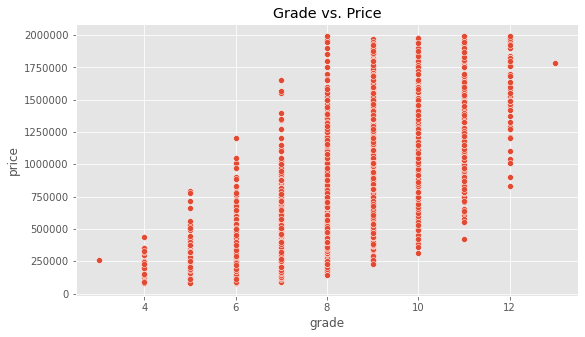

In [90]:
#let's take another look with scatter
plt.figure(figsize=(9, 5))
sns.scatterplot(x='grade', y='price', data=df).set_title('Grade vs. Price')
plt.ticklabel_format(style='plain')#style='plain', 'sci', 'scientific'

Grade may even increase quadratically - let's make a x^2 column for it.  Note, this is a departure for the linearity requirement of our linear regression model - but the grade graph is so compelling, I think it's valid.

In [15]:
# Feature engineering!
df['grade_squared'] = df['grade']**2

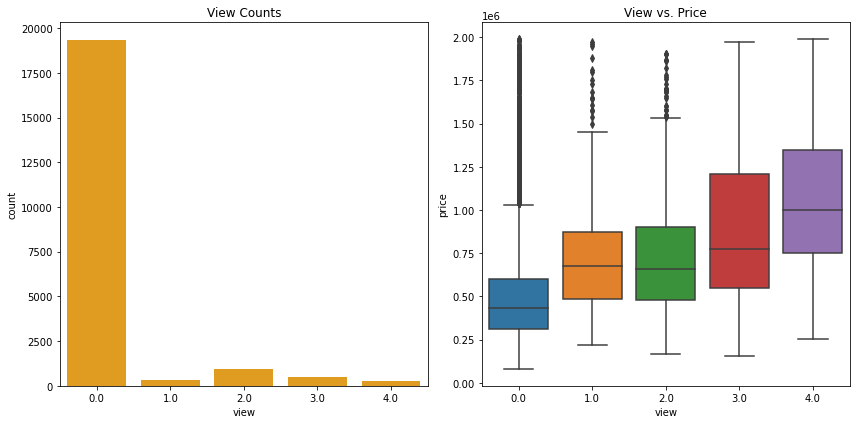

In [16]:
# View
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].set_title('View Counts')
sns.countplot(df['view'], ax=axes[0], color='orange')

axes[1].set_title('View vs. Price')
sns.boxplot(x='view', y='price', data=df, ax=axes[1])

plt.tight_layout()

Documentation is unclear about what View entails.  But, it seems like more is better.  

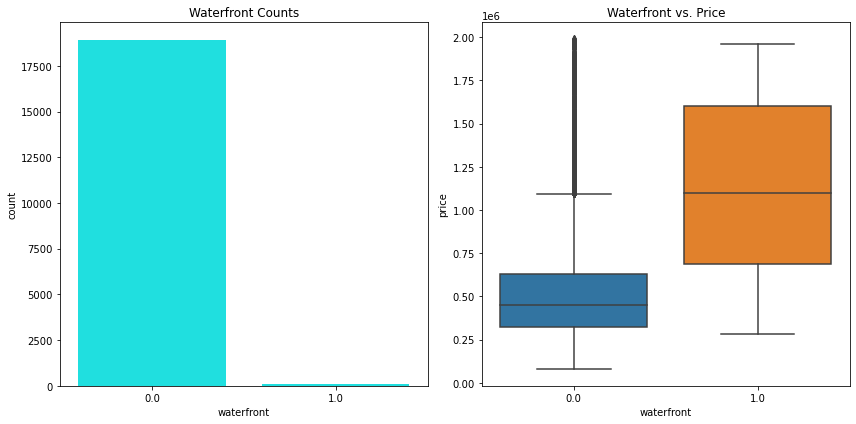

In [17]:
# Waterfront 
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].set_title('Waterfront Counts')
sns.countplot(df['waterfront'], ax=axes[0], color='cyan')

axes[1].set_title('Waterfront vs. Price')
sns.boxplot(x='waterfront', y='price', data=df, ax=axes[1])

plt.tight_layout()

Homes with waterfront proximity tend to have higher prices.

# Latitude and longitude
Each of these values alone doesn't tell the story of neighborhood value - we need them together somehow.  

In [18]:
# Neighborhood has a huge impact in house prices historically.  Though linear regression may be difficult to find this, 
# I found a nice visualization package for this.
import folium
from folium.plugins import HeatMap

price_map = folium.Map(location=[47.5,-122.3], 
                       tiles = "Stamen Terrain",
                      zoom_start = 9)
data_heatmap = df[['lat','long','price']]
data_heatmap = df.dropna(axis=0, subset=['lat','long','price'])
data_heatmap = [[row['lat'],row['long']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=10, 
        gradient = {.35: 'purple',.55: 'blue',.68:'yellow',.78:'red'}).add_to(price_map)
price_map

# Other Data Cleaning

In [19]:
#sqft_basement is an object.  let's look into that.
display(df.sqft_basement.value_counts())
#looks like there are "?" values here.  
df[['sqft_basement', 'floors']][df.sqft_basement == '?']
df[df.sqft_basement == '?']
#Aha!  it appears that the sum of sqft_above + sqft_basement seems to equal sqft_living.  So, we can calculate missing sqft_basement numbers.
df.loc[df.sqft_basement=='?','sqft_basement'] = df.sqft_living - df.sqft_above
df.sqft_basement = df.sqft_basement.astype(float) 
#df.loc[df.sqft_basement<0]
#df.loc[df.sqft_basement=='?']

#df.info()

0.0       12771
?           450
600.0       215
500.0       209
700.0       205
          ...  
1990.0        1
2250.0        1
2850.0        1
1798.0        1
143.0         1
Name: sqft_basement, Length: 291, dtype: int64

In [20]:
#I noticed that yr_renovated has 0 values.
#let's overwrite yr_renovated 0 values to yr_built - seems most representative.  may want to revisit this.
df.loc[df.yr_renovated==0,'yr_renovated'] = df.yr_built
#df.loc[df.sqft_basement=='?','sqft_basement'] = df.sqft_living - df.sqft_above
df.yr_renovated.value_counts()

2014.0    524
2005.0    402
2006.0    391
2004.0    379
2007.0    372
         ... 
1901.0     22
1902.0     20
1933.0     14
1935.0     12
1934.0     10
Name: yr_renovated, Length: 116, dtype: int64

In [21]:
#fix date/time all the way down, first.
df.date =  pd.to_datetime(df['date']) #pd.to_datetime(df.date,format= '%Y%B') 10/13/2014
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21388 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21388 non-null  int64         
 1   date           21388 non-null  datetime64[ns]
 2   price          21388 non-null  float64       
 3   bedrooms       21388 non-null  int64         
 4   bathrooms      21388 non-null  float64       
 5   sqft_living    21388 non-null  int64         
 6   sqft_lot       21388 non-null  int64         
 7   floors         21388 non-null  float64       
 8   waterfront     19029 non-null  float64       
 9   view           21326 non-null  float64       
 10  condition      21388 non-null  int64         
 11  grade          21388 non-null  int64         
 12  sqft_above     21388 non-null  int64         
 13  sqft_basement  21388 non-null  float64       
 14  yr_built       21388 non-null  int64         
 15  yr_renovated   1758

# Feature Engineering - date and day of week

In [22]:
#In addition, let's extract day/mo/yr and Feature Engineer ourselves a day of the week!
#df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].apply(lambda date : date.year)
df['month'] = df['date'].apply(lambda date : date.month)
df['day'] = df['date'].apply(lambda date : date.day)
#df['day'].value_counts()
df['dayOfWeek'] = df['date'].apply(lambda date : date.dayofweek)
df['dayOfWeek'].value_counts()
#Note for day of week, Monday is 0, Sunday is 6

1    4659
2    4547
0    4060
3    3960
4    3648
5     285
6     229
Name: dayOfWeek, dtype: int64

Text(0.5, 1.0, 'Year vs. Price')

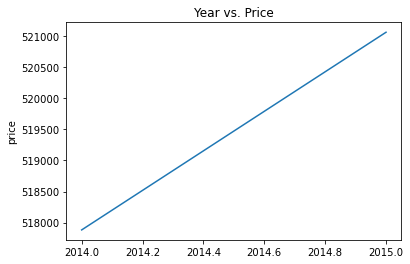

In [23]:
#Let's inspect date relationships a little
sns.lineplot(x=df['year'].unique(), y=df.groupby('year').mean()['price']).set_title('Year vs. Price')

Text(0.5, 1.0, 'Month vs. Price')

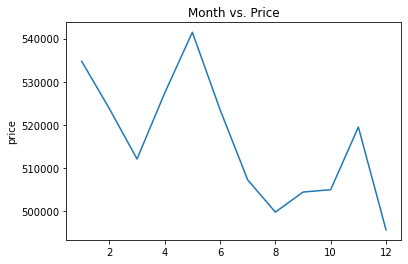

In [24]:
sns.lineplot(x=df['month'].unique(), y=df.groupby('month').mean()['price']).set_title('Month vs. Price')

Text(0.5, 1.0, 'Day of Month vs. Price')

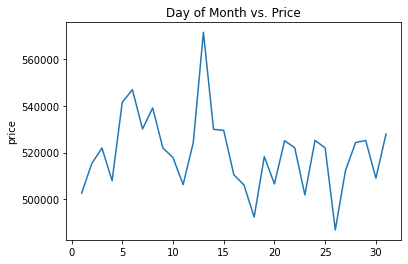

In [25]:
sns.lineplot(x=df['day'].unique(), y=df.groupby('day').mean()['price']).set_title('Day of Month vs. Price')

Text(0.5, 1.0, 'Day of Week vs. Price')

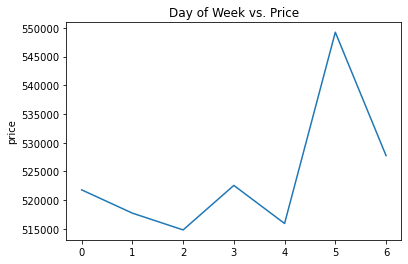

In [26]:
sns.lineplot(x=df['dayOfWeek'].unique(), y=df.groupby('dayOfWeek').mean()['price']).set_title('Day of Week vs. Price')

# Date summary
Prices seem to increase by year; there is some seasonality by month.  Day of Month seems unpredictable.  Day of week definitely has some notable pattern (especially Friday-Saturday).

In [27]:
if verbose:
    df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21388 entries, 0 to 21596
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21388 non-null  int64         
 1   date           21388 non-null  datetime64[ns]
 2   price          21388 non-null  float64       
 3   bedrooms       21388 non-null  int64         
 4   bathrooms      21388 non-null  float64       
 5   sqft_living    21388 non-null  int64         
 6   sqft_lot       21388 non-null  int64         
 7   floors         21388 non-null  float64       
 8   waterfront     19029 non-null  float64       
 9   view           21326 non-null  float64       
 10  condition      21388 non-null  int64         
 11  grade          21388 non-null  int64         
 12  sqft_above     21388 non-null  int64         
 13  sqft_basement  21388 non-null  float64       
 14  yr_built       21388 non-null  int64         
 15  yr_renovated   1758

# yr_renovated  
Overwriting yr_renovated = 0 entries

In [28]:
##We should probably remap 0 in yr_renovated to something.  it doesn't work as a proper ordinal for linear regression otherwise
###  probably replace with yr_built
df[df['yr_renovated']==0]['yr_renovated']  = df[df['yr_renovated']==0]['yr_built']

display(df[df['yr_renovated']==0]['yr_built'])
#X_train['yr_renovated']



Series([], Name: yr_built, dtype: int64)

# Zipcode
There are too many zipcodes to properly one-hot encode them.  One approach is to create a new ordinal column based on the mean price for each zipcode


In [29]:
zipcode_mean = df.groupby('zipcode').mean()
zipcode_mean.sort_values('price', ascending=False)
df['zipcode_avg'] = df['zipcode'].apply(lambda zipcode : zipcode_mean.loc[zipcode]['price'])

# Okay, that's good so far for course cleaning; let's get a little more nuanced.  
Before we can clean those na columns with style, we should train/test split.

#  Train Test Split!!!!!

In [30]:
target = 'price'
X = df.drop(target, axis = 1)
y = df[target]

In [31]:
SPLIT_IS_RANDOM = False
if SPLIT_IS_RANDOM:
    random_state = randint(1,2**32 - 2)
    #print(random_state)
else:
    random_state = 14
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_state)
#X_train

Great, now that we have the split, we can fix/impute some fixed columns

In [32]:
#waterfront cleaning
display(df.waterfront.value_counts())
display(df.waterfront.isna().sum())
# https://github.com/ericthansen/dsc-sklearn-preprocessing-lab
#display(df[df['waterfront'].isna()].head())
#I don't see any corresponding column to indicate these are real values; or interpret NAs as anything meaningful, since
#there are also 0s.  So I'll presume these are missing, make a missing indicator, then fill with another value.  I'm 
#will use the median, but since this is really more of a categorical value than a ordinal, I don't want it to be treated as ordinal.

col = 'waterfront'

# (1) Identify data to be transformed
# We only want missing indicators for column
col1_train = X_train[[col]]

# (2) Instantiate the transformer object
missing_indicator1 = MissingIndicator()

# (3) Fit the transformer object on col
missing_indicator1.fit(col1_train)

# (4) Transform col and assign the result
# to col_missing_train
col1_missing_train = missing_indicator1.transform(col1_train)

# Visually inspect col_missing_train
#col1_missing_train

#import numpy as np

# col_missing_train should be a NumPy array
assert type(col1_missing_train) == np.ndarray

# We should have the same number of rows as the full X_train
assert col1_missing_train.shape[0] == X_train.shape[0]

# But we should only have 1 column
assert col1_missing_train.shape[1] == 1

X_train["waterfront_Missing"] = col1_missing_train
#X_train


# (1) col1_train was created previously, so we don't
# need to extract the relevant data again

# (2) Instantiate a SimpleImputer with strategy="median"
imputer1 = SimpleImputer(strategy='median')

# (3) Fit the imputer on col_train
imputer1.fit(col1_train)

# (4) Transform frontage_train using the imputer and
# assign the result to col_imputed_train
col1_imputed_train = imputer1.transform(col1_train)

# Visually inspect col_imputed_train
display(col1_imputed_train)

# Run this cell without changes

# (5) Replace value of col
X_train["waterfront"] = col1_imputed_train

# Visually inspect X_train
# display(X_train)

display(X_train.waterfront.value_counts())
display(X_train.waterfront.isna().sum())


0.0    18928
1.0      101
Name: waterfront, dtype: int64

2359

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

0.0    15961
1.0       80
Name: waterfront, dtype: int64

0

In [33]:
#view pre-cleaning exploration
display(X_train.view.value_counts())
display('N/A count:', X_train.view.isna().sum())
#display(df[(df.view.isna() & df.view==0)])

# Since there are values of 0 here, I'm inclined to assume that N/A doesn't just mean 0.  So, let's take the same approach as with waterfront.



0.0    14486
2.0      704
3.0      362
1.0      242
4.0      191
Name: view, dtype: int64

'N/A count:'

56

In [34]:
col = 'view'

# (1) Identify data to be transformed
# We only want missing indicators for column
col2_train = X_train[[col]]

# (2) Instantiate the transformer object
missing_indicator2 = MissingIndicator()

# (3) Fit the transformer object on col
missing_indicator2.fit(col2_train)

# (4) Transform col and assign the result
# to col_missing_train
col2_missing_train = missing_indicator2.transform(col2_train)

# Visually inspect col_missing_train
#col2_missing_train

#import numpy as np

# col_missing_train should be a NumPy array
assert type(col2_missing_train) == np.ndarray

# We should have the same number of rows as the full X_train
assert col2_missing_train.shape[0] == X_train.shape[0]

# But we should only have 1 column
assert col2_missing_train.shape[1] == 1

X_train["view_Missing"] = col2_missing_train
#X_train


# (1) col1_train was created previously, so we don't
# need to extract the relevant data again

# (2) Instantiate a SimpleImputer with strategy="median"
imputer2 = SimpleImputer(strategy='median')

# (3) Fit the imputer on col_train
imputer2.fit(col2_train)

# (4) Transform frontage_train using the imputer and
# assign the result to col_imputed_train
col2_imputed_train = imputer2.transform(col2_train)

# Visually inspect col_imputed_train
#display(col2_imputed_train)

# Run this cell without changes

# (5) Replace value of col
X_train[col] = col2_imputed_train

# Visually inspect X_train
# display(X_train)

display(X_train[col].value_counts())
display('N/A count:', X_train[col].isna().sum())


0.0    14542
2.0      704
3.0      362
1.0      242
4.0      191
Name: view, dtype: int64

'N/A count:'

0

In [35]:
# yr_renovated cleaning 
display(X_train.yr_renovated.value_counts())
display(X_train.yr_renovated.isna().sum())
X_train[X_train.yr_renovated == 0]

col = 'yr_renovated'


# (1) Identify data to be transformed
# We only want missing indicators for column
col3_train = X_train[[col]]

# (2) Instantiate the transformer object
missing_indicator3 = MissingIndicator()

# (3) Fit the transformer object on col
missing_indicator3.fit(col3_train)

# (4) Transform col and assign the result
# to col_missing_train
col3_missing_train = missing_indicator3.transform(col3_train)

# Visually inspect col_missing_train
#col2_missing_train

#import numpy as np

# col_missing_train should be a NumPy array
assert type(col3_missing_train) == np.ndarray

# We should have the same number of rows as the full X_train
assert col3_missing_train.shape[0] == X_train.shape[0]

# But we should only have 1 column
assert col3_missing_train.shape[1] == 1

X_train["yr_renovated_Missing"] = col3_missing_train
#X_train


# (1) col1_train was created previously, so we don't
# need to extract the relevant data again

# (2) Instantiate a SimpleImputer with strategy="median"
imputer3 = SimpleImputer(strategy='median')

# (3) Fit the imputer on col_train
imputer3.fit(col3_train)

# (4) Transform frontage_train using the imputer and
# assign the result to col_imputed_train
col3_imputed_train = imputer3.transform(col3_train)

# Visually inspect col_imputed_train
#display(col2_imputed_train)

# Run this cell without changes

# (5) Replace value of col
X_train[col] = col3_imputed_train

# Visually inspect X_train
# display(X_train)

display(X_train[col].value_counts())
display('N/A count:', X_train[col].isna().sum())



2014.0    381
2006.0    292
2005.0    289
2004.0    283
2007.0    280
         ... 
1902.0     14
1901.0     14
1935.0     11
1933.0     10
1934.0      6
Name: yr_renovated, Length: 116, dtype: int64

2848

1977.0    3110
2014.0     381
2006.0     292
2005.0     289
2004.0     283
          ... 
1902.0      14
1901.0      14
1935.0      11
1933.0      10
1934.0       6
Name: yr_renovated, Length: 116, dtype: int64

'N/A count:'

0

In [36]:
if verbose:
    #display(X_train.value_counts())
    display('N/A count:', X_train.isna().sum())

'N/A count:'

id                      0
date                    0
bedrooms                0
bathrooms               0
sqft_living             0
sqft_lot                0
floors                  0
waterfront              0
view                    0
condition               0
grade                   0
sqft_above              0
sqft_basement           0
yr_built                0
yr_renovated            0
zipcode                 0
lat                     0
long                    0
sqft_living15           0
sqft_lot15              0
grade_squared           0
year                    0
month                   0
day                     0
dayOfWeek               0
zipcode_avg             0
waterfront_Missing      0
view_Missing            0
yr_renovated_Missing    0
dtype: int64

In [37]:
#More checking for types - numerical or do we need categorical?  We can do a thorough check:
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16041 entries, 7688 to 19232
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    16041 non-null  int64         
 1   date                  16041 non-null  datetime64[ns]
 2   bedrooms              16041 non-null  int64         
 3   bathrooms             16041 non-null  float64       
 4   sqft_living           16041 non-null  int64         
 5   sqft_lot              16041 non-null  int64         
 6   floors                16041 non-null  float64       
 7   waterfront            16041 non-null  float64       
 8   view                  16041 non-null  float64       
 9   condition             16041 non-null  int64         
 10  grade                 16041 non-null  int64         
 11  sqft_above            16041 non-null  int64         
 12  sqft_basement         16041 non-null  float64       
 13  yr_built     

id       date  bedrooms  bathrooms  sqft_living  sqft_lot  \
7688   2781250100 2015-04-15         3        2.5         2550      5349   
12456  2386000240 2014-09-29         5        3.5         3870     65556   
17230  5406500440 2014-08-12         4        2.5         2780      6235   
15395  1723049008 2014-08-22         2        1.0          930      8665   
12903  6352600650 2015-04-02         4        2.5         3330      8897   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
7688      2.0         0.0   0.0          3      7        2550            0.0   
12456     2.0         0.0   0.0          3     10        3870            0.0   
17230     2.0         0.0   0.0          3      8        2780            0.0   
15395     1.0         0.0   0.0          4      6         930            0.0   
12903     2.0         0.0   0.0          3     10        3330            0.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
7688       2004        2004.0    98038  47.3504 -122.026           2640   
12456      1994        1994.0    98053  47.6403 -121.992           4290   
17230      2001        2001.0    98075  47.5976 -122.039           2670   
15395      1938        1938.0    98168  47.4822 -122.318           1630   
12903      2001        2001.0    98074  47.6484 -122.080           3150   

       sqft_lot15  grade_squared  year  month  day  dayOfWeek    zipcode_avg  \
7688         5400             49  2015      4   15          2  367091.483871   
12456       67019            100  2014      9   29          0  669570.221945   
17230        4410             64  2014      8   12          1  770489.461972   
15395       12375             36  2014      8   22          4  240328.371747   
12903        7515            100  2015      4    2          3  673294.627854   

       waterfront_Missing  view_Missing  yr_renovated_Missing  
7688                False         False                 False  
12456                True         False                 False  
17230               False         False                 False  
15395               False         False                 False  
12903               False         False                 False

In [38]:
#checking into unique values for each column
for col in X_train.columns:
    print(col)
    display(X_train[col].value_counts())
    
#notes:  Id has some repeats.  what's up with that? ------- let's drop it anyway, it's probably meaningless...
#bedrooms - a house with 33 bedrooms?
#bathrooms .75 up, with .25 increments
#floors is 1-3.5 by .5, categorical
#waterfront is 0/1 cat
#view is 0-4 cat
#condition 1-5 categorical
#grade 3-13 ordinals - categorical? that's a lot for one-hot
#yr_built...ordinal... probably too many for onehot
#yr_renovated, same --------------------------------------should alter the ones with 0 value
#zipcode categorical but 70 options...
#lat and longitude - i expect this to matter, but not in a linear way
#waterfront_missing boolean
#view_missing boolean
#yr_renovated missing boolean

id


5417600130    2
2892700041    2
6308000010    2
722039087     2
6021500970    2
             ..
2626119062    1
7436400020    1
104530240     1
2976800145    1
1777500160    1
Name: id, Length: 15950, dtype: int64

date


2015-04-27    105
2014-06-23    104
2014-06-26    104
2015-04-14    100
2014-06-25     97
             ... 
2015-01-10      1
2014-07-06      1
2014-08-31      1
2014-05-17      1
2014-08-24      1
Name: date, Length: 364, dtype: int64

bedrooms


3     7398
4     5053
2     2056
5     1154
6      189
1      155
7       21
8        9
9        4
10       2
Name: bedrooms, dtype: int64

bathrooms


2.50    4006
1.00    2871
1.75    2305
2.25    1536
2.00    1447
1.50    1100
2.75     872
3.00     556
3.50     515
3.25     433
3.75     107
4.00      86
4.50      68
0.75      50
4.25      45
5.00      10
1.25       8
4.75       7
5.25       5
0.50       4
5.50       3
6.00       2
5.75       2
6.75       1
6.50       1
7.50       1
Name: bathrooms, dtype: int64

sqft_living


1400    105
1010    101
1660     98
1440     96
1650     96
       ... 
1594      1
1413      1
5720      1
1626      1
2031      1
Name: sqft_living, Length: 843, dtype: int64

sqft_lot


5000      261
6000      230
4000      189
7200      149
7500       90
         ... 
276170      1
5838        1
7887        1
9936        1
53250       1
Name: sqft_lot, Length: 7949, dtype: int64

floors


1.0    8005
2.0    6055
1.5    1418
3.0     461
2.5      98
3.5       4
Name: floors, dtype: int64

waterfront


0.0    15961
1.0       80
Name: waterfront, dtype: int64

view


0.0    14542
2.0      704
3.0      362
1.0      242
4.0      191
Name: view, dtype: int64

condition


3    10401
4     4232
5     1248
2      138
1       22
Name: condition, dtype: int64

grade


7     6704
8     4545
9     1940
6     1551
10     797
11     246
5      193
12      45
4       18
13       1
3        1
Name: grade, dtype: int64

sqft_above


1200    160
1010    158
1300    157
1220    148
1250    137
       ... 
2244      1
2196      1
2891      1
2092      1
2031      1
Name: sqft_above, Length: 781, dtype: int64

sqft_basement


0.0       9804
600.0      171
700.0      161
500.0      150
800.0      149
          ... 
415.0        1
1730.0       1
2010.0       1
3260.0       1
915.0        1
Name: sqft_basement, Length: 268, dtype: int64

yr_built


2014    410
2006    331
2005    325
2004    325
1977    314
       ... 
1901     19
1933     19
1902     18
1935     16
1934     13
Name: yr_built, Length: 116, dtype: int64

yr_renovated


1977.0    3110
2014.0     381
2006.0     292
2005.0     289
2004.0     283
          ... 
1902.0      14
1901.0      14
1935.0      11
1933.0      10
1934.0       6
Name: yr_renovated, Length: 116, dtype: int64

zipcode


98103    442
98038    439
98052    427
98042    422
98115    419
        ... 
98102     76
98010     73
98024     60
98148     41
98039     23
Name: zipcode, Length: 70, dtype: int64

lat


47.5322    16
47.5491    15
47.6955    14
47.5396    14
47.5533    13
           ..
47.4152     1
47.2725     1
47.3938     1
47.3926     1
47.6085     1
Name: lat, Length: 4790, dtype: int64

long


-122.290    85
-122.300    81
-122.362    81
-122.372    80
-122.350    76
            ..
-121.792     1
-121.947     1
-122.474     1
-121.822     1
-121.743     1
Name: long, Length: 729, dtype: int64

sqft_living15


1440    158
1540    153
1560    143
1620    130
1500    127
       ... 
2189      1
4270      1
2253      1
4350      1
2049      1
Name: sqft_living15, Length: 688, dtype: int64

sqft_lot15


5000     308
4000     262
6000     223
7200     157
7500     107
        ... 
9832       1
34412      1
5742       1
3709       1
20502      1
Name: sqft_lot15, Length: 7208, dtype: int64

grade_squared


49     6704
64     4545
81     1940
36     1551
100     797
121     246
25      193
144      45
16       18
169       1
9         1
Name: grade_squared, dtype: int64

year


2014    10820
2015     5221
Name: year, dtype: int64

month


5     1794
4     1693
7     1618
6     1618
8     1417
3     1386
10    1368
9     1337
12    1074
11    1072
2      942
1      722
Name: month, dtype: int64

day


23    674
5     616
9     598
24    592
27    582
20    572
17    571
16    568
22    553
25    551
10    546
2     545
12    543
18    536
13    535
6     531
8     527
11    517
3     517
14    506
4     502
26    492
21    487
19    486
7     480
29    472
30    447
15    447
28    440
1     419
31    189
Name: day, dtype: int64

dayOfWeek


1    3513
2    3402
0    3027
3    2940
4    2771
5     218
6     170
Name: dayOfWeek, dtype: int64

zipcode_avg


5.849573e+05    442
3.670915e+05    439
6.425309e+05    427
3.115803e+05    422
6.170575e+05    419
               ... 
7.735273e+05     76
4.236660e+05     73
5.861209e+05     60
2.849086e+05     41
1.455000e+06     23
Name: zipcode_avg, Length: 70, dtype: int64

waterfront_Missing


False    14266
True      1775
Name: waterfront_Missing, dtype: int64

view_Missing


False    15985
True        56
Name: view_Missing, dtype: int64

yr_renovated_Missing


False    13193
True      2848
Name: yr_renovated_Missing, dtype: int64

# First pass at splitting numeric vs categorical  
At the same time, we can inspect for normality

<Figure size 432x288 with 0 Axes>

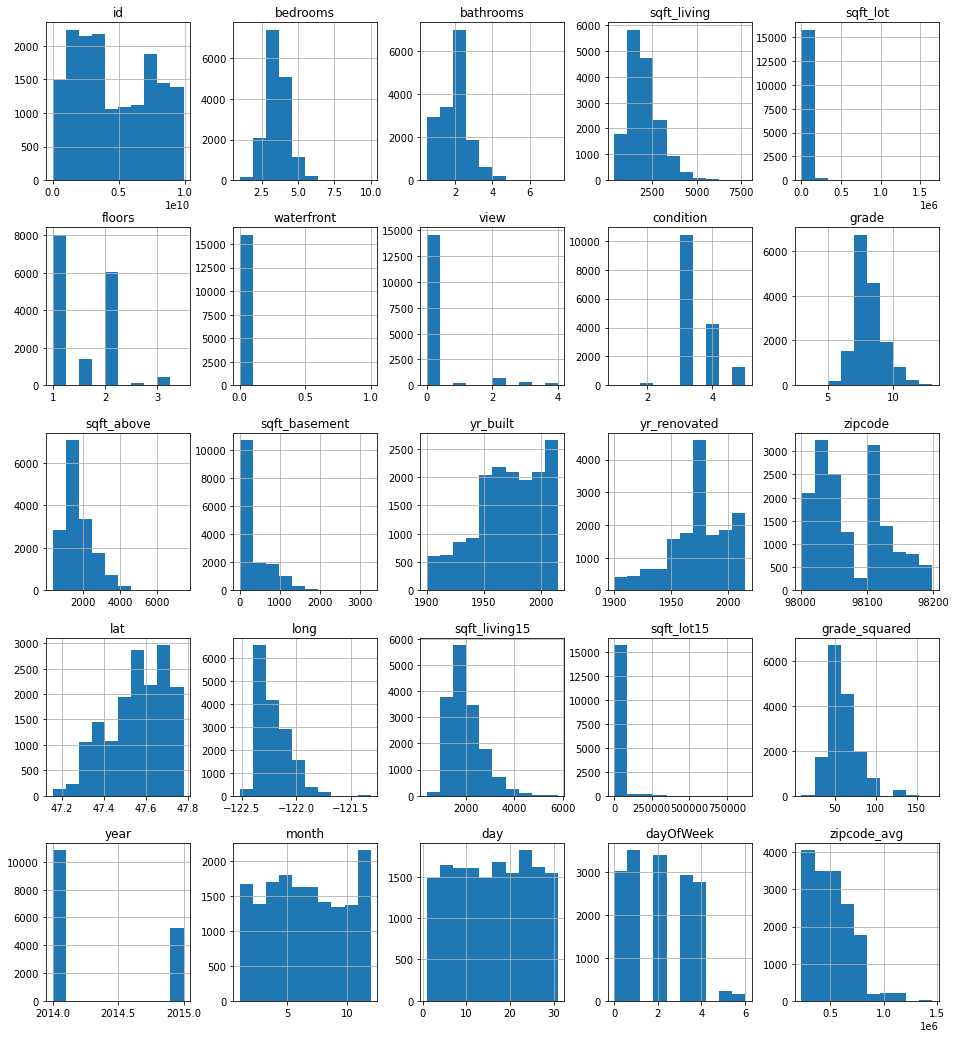

In [39]:
plt.tight_layout()
exclude = ['waterfront_Missing','view_Missing','yr_renovated_Missing']
X_hist = X_train.drop(exclude, axis=1)
if verbose: 
    X_hist.hist(figsize  = [16, 18],);



Virtually all the numerical columns exhibit some non-standardness (tails, bimodal, etc).  Could log tranform them all.  Also, we'll want to use standard normalization.

# Column allocation

In [40]:
#I would want to only keep relevant columns.  I.e, an id number shouldn't have any real impact, so that would be one to drop.
#But, who knows, if the id numbers are not assigned at random, there could be some meaning there.  But for now, I'll drop.
#We will do some iterative model building.  For round 1, let's go for maximizing interpretability, so minimal number of high-column-count-categoricals
dropped_cols = ['id','day', 'date', 'zipcode']
num_cols = [  'sqft_living', 'sqft_lot',
         'grade', 'grade_squared','sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated',  'lat', 'long',
       'sqft_living15', 'sqft_lot15',
            'bedrooms', 'bathrooms',
             'zipcode_avg',
            
       ]#'date',
#non_log_cols = ['sqft_basement, ']
#plan to move month/dayOfWeek to categorical eventually
#originally put bedrooms/bathrooms as categoricals...but moved back up to numeric
cat_cols = ['year', 'month', 'dayOfWeek','condition','floors', 'waterfront', 'view', 
            'waterfront_Missing', 'view_Missing','yr_renovated_Missing']
#display(sorted(X_train.columns))
#display(sorted(dropped_cols+num_cols+cat_cols))
print(len(X_train.columns),'+', len(dropped_cols), len(num_cols) , len(cat_cols))
assert len(X_train.columns) == len(dropped_cols) + len(num_cols) + len(cat_cols)



29 + 4 15 10


# Introductory heatmap - before any transformations or one-hot encoding

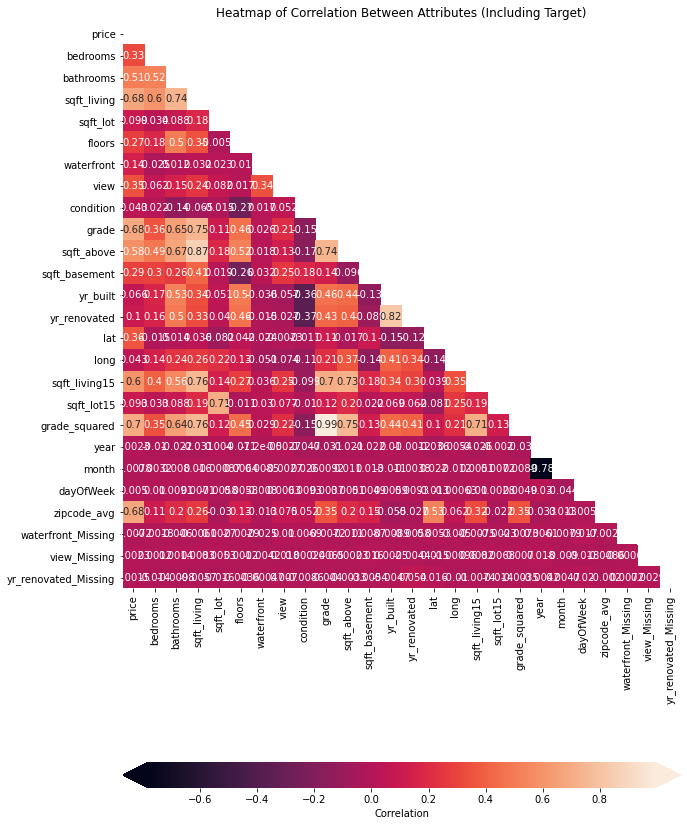

In [41]:
#Exploring correlation and multicollinearity in the data

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_state)

heatmap_data = pd.concat([y_train, X_train.drop(dropped_cols, axis=1)], axis=1)
# https://seaborn.pydata.org/generated/seaborn.jointplot.html
#did corr matrix
heatmap_data.corr()
#used heatmap
import seaborn as sns
import numpy as np

# Create a df with the target as the first column,
# then compute the correlation matrix
##heatmap_data = pd.concat([y_train, X_train], axis=1)
##corr = heatmap_data.corr()
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(10, 16))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations

sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

Just from this inspection, we may start to target sqft_living15, sqft_basement, sqft_above, grade, sqft_living, grade_sq, zipcode_avg.
Also note the correlation between grade and grade_squared - not surprising, probably should remove grade.  Will do VIF to verify, then likely remove.

In [42]:
#Temporary reload point
#backup = X_train.copy()
#X_train = backup.copy()

# One-hot Encoding of Categoricals

In [43]:
#Next steps - onehot encode categoricals
#from sklearn.preprocessing import OneHotEncoder
# (1) Create a variable fireplace_qu_train
# extracted from X_train
# (double brackets due to shape expected by OHE)
##fireplace_qu_train = X_train[["FireplaceQu"]]

# (2) Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
##ohe = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')

# (3) Fit the encoder on fireplace_qu_train
##ohe.fit(fireplace_qu_train)

# Inspect the categories of the fitted encoder
##ohe.categories_
cat_dict = {}
for col in cat_cols:
    col_train = X_train[[col]]
    ohe = OneHotEncoder(categories='auto', sparse=False, drop='first', handle_unknown='error')
    ohe.fit(col_train)
    cat_dict[col] = ohe
    if verbose:
        display(col, ohe.categories_)
    # (4) Transform fireplace_qu_train using the encoder and
    # assign the result to fireplace_qu_encoded_train
    col_train_encoded = ohe.transform(col_train)
    
    if verbose:
        pass
        #display('featurenames:', ohe.get_feature_names([col]))
    

    # Visually inspect fireplace_qu_encoded_train
    #fireplace_qu_encoded_train
    
    col_train_encoded = pd.DataFrame(
        # Pass in NumPy array
        col_train_encoded,
        # Set the column names to the categories found by OHE
        #columns=ohe.categories_[0][1:], #old and busted; instead use this cool thing:
        columns = ohe.get_feature_names([col]),
        # Set the index to match X_train's index
        index=X_train.index
    )
    # (5b) Drop original FireplaceQu column
    X_train.drop(col, axis=1, inplace=True)
    
    # (5c) Concatenate the new dataframe with current X_train
    X_train = pd.concat([X_train, col_train_encoded], axis=1)
    
#X_train.info()   

'year'

[array([2014, 2015], dtype=int64)]

'month'

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)]

'dayOfWeek'

[array([0, 1, 2, 3, 4, 5, 6], dtype=int64)]

'condition'

[array([1, 2, 3, 4, 5], dtype=int64)]

'floors'

[array([1. , 1.5, 2. , 2.5, 3. , 3.5])]

'waterfront'

[array([0., 1.])]

'view'

[array([0., 1., 2., 3., 4.])]

'waterfront_Missing'

[array([False,  True])]

'view_Missing'

[array([False,  True])]

'yr_renovated_Missing'

[array([False,  True])]

# Drop dropped_cols

In [44]:
#date seems to be causing trouble.  drop it if it hasn't already been dropped
X_train.head()
#X_train.info()
#y_train
X_train.date.value_counts()
X_train = X_train.drop(dropped_cols, axis = 1)
#X_test = X_test.drop('date', axis = 1)

# Prepare log and scaler functions

In [45]:
#Earlier, we checked numericals for desirable properties; if problematic, log, then/and/or scale them
#******
#pd.plotting.scatter_matrix(X_train[num_cols], figsize=(10,12)); #This command creates too big of a plot
#see also normalization function below
def log_col(col):
    '''input a pd series
    return a log-ed series'''
    return np.log(col)
#testing
#display(log_col(X['sqft_living']))
#display((X['sqft_living']))

In [46]:
#Here, define a streamlined scaling function using the StandardScaler from scikitlearn
def scale(col):
    '''input a pd series
    return a scaled series'''
    #from sklearn.preprocessing import StandardScaler
    #this was a pain to reshape and such.  Do it the manual way.
#     l = len(col)
#     a = np.array(col).reshape(-1,1)
#     scaler = StandardScaler()
#     scaler.fit(a)
#     trans = scaler.transform(a)
#     trans = trans.reshape(l,)
    trans = (col-np.mean(col))/np.sqrt(np.var(col))
    
    return pd.Series(trans)
#testing
#scaled = scale(np.array(X_train['sqft_living']).reshape(-1,1))
scaled = scale(X_train['sqft_living'])
display('scaled',scaled, scaled.shape)
display('orig',X_train.sqft_living)

'scaled'

7688     0.578587
12456    2.108049
17230    0.845084
15395   -1.298479
12903    1.482360
           ...   
12132   -0.128209
19016    0.787150
9576     1.737270
13779   -1.402760
19232   -0.985635
Name: sqft_living, Length: 16041, dtype: float64

(16041,)

'orig'

7688     2550
12456    3870
17230    2780
15395     930
12903    3330
         ... 
12132    1940
19016    2730
9576     3550
13779     840
19232    1200
Name: sqft_living, Length: 16041, dtype: int64

In [47]:
#Check for 0 values - don't want to log those
for col in num_cols:
    if verbose:
        if df[col].min() <= 0:
            display(col, df[col].min())
    
#aha, of course, sqft_basement has 0 values.  As it turns out, we'll be removing this anyway due to multicollinearity needs,
#but for now let's just not log it.
#Also, longitude is negative...so we can't log that either. - let's take its absolute value so as to retain it.



'sqft_basement'

0.0

'long'

-122.51899999999999

# Apply log and scaler where applicable

In [48]:
non_log_cols=['sqft_basement']
X_train.long = abs(X_train.long)

to_log = True
to_scale = True

for col in num_cols:
    currcol = X_train[col]
    if to_log:
        if col not in non_log_cols:
            currcol = log_col(currcol)
    if to_scale:
        currcol = scale(currcol)
    X_train[col] = currcol

In [49]:
X_train.describe()

bedrooms     bathrooms   sqft_living      sqft_lot         grade  \
count  1.604100e+04  1.604100e+04  1.604100e+04  1.604100e+04  1.604100e+04   
mean   9.827187e-14 -1.248860e-13  4.696497e-14  2.363019e-14  2.350018e-12   
std    1.000031e+00  1.000031e+00  1.000031e+00  1.000031e+00  1.000031e+00   
min   -4.160715e+00 -3.520416e+00 -3.843249e+00 -3.015150e+00 -6.296804e+00   
25%   -2.660120e-01 -6.860452e-01 -6.778783e-01 -5.085502e-01 -5.107804e-01   
50%   -2.660120e-01  3.600367e-01  2.134638e-02 -5.414580e-02 -5.107804e-01   
75%    7.538530e-01  6.318621e-01  6.994596e-01  3.109389e-01  4.010782e-01   
max    4.002205e+00  3.466233e+00  3.390854e+00  5.888002e+00  3.716512e+00   

         sqft_above  sqft_basement      yr_built  yr_renovated           lat  \
count  1.604100e+04   1.604100e+04  1.604100e+04  1.604100e+04  1.604100e+04   
mean   1.188162e-13   4.466085e-16 -3.188006e-12  7.541228e-12  1.993604e-12   
std    1.000031e+00   1.000031e+00  1.000031e+00  1.000031e+00  1.000031e+00   
min   -3.446658e+00  -6.603555e-01 -2.460175e+00 -2.885434e+00 -2.919801e+00   
25%   -7.259823e-01  -6.603555e-01 -6.788323e-01 -5.709225e-01 -6.493042e-01   
50%   -9.606063e-02  -6.603555e-01  1.433947e-01  1.213368e-01  8.019410e-02   
75%    7.277341e-01   6.148703e-01  8.546882e-01  7.314075e-01  8.562817e-01   
max    3.636075e+00   6.898256e+00  1.491820e+00  1.562305e+00  1.566811e+00   

               long  sqft_living15    sqft_lot15  grade_squared   zipcode_avg  \
count  1.604100e+04   1.604100e+04  1.604100e+04   1.604100e+04  1.604100e+04   
mean   2.603373e-12   1.094562e-13 -2.838455e-15   2.350018e-12  6.136548e-13   
std    1.000031e+00   1.000031e+00  1.000031e+00   1.000031e+00  1.000031e+00   
min   -6.377762e+00  -4.750378e+00 -3.046620e+00  -6.296804e+00 -1.985462e+00   
25%   -6.269516e-01  -7.176114e-01 -5.161234e-01  -5.107804e-01 -8.462190e-01   
50%    1.086595e-01  -6.455412e-02 -2.251544e-02  -5.107804e-01  4.813389e-02   
75%    8.153878e-01   6.917533e-01  3.177502e-01   4.010782e-01  6.580246e-01   
max    2.156581e+00   3.478991e+00  5.803254e+00   3.716512e+00  2.997892e+00   

          year_2015       month_2       month_3       month_4       month_5  \
count  16041.000000  16041.000000  16041.000000  16041.000000  16041.000000   
mean       0.325478      0.058725      0.086404      0.105542      0.111838   
std        0.468568      0.235116      0.280968      0.307260      0.315177   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            month_6       month_7       month_8       month_9      month_10  \
count  16041.000000  16041.000000  16041.000000  16041.000000  16041.000000   
mean       0.100867      0.100867      0.088336      0.083349      0.085281   
std        0.301161      0.301161      0.283792      0.276418      0.279309   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           month_11      month_12   dayOfWeek_1   dayOfWeek_2   dayOfWeek_3  \
count  16041.000000  16041.000000  16041.000000  16041.000000  16041.000000   
mean       0.066829      0.066953      0.219001      0.212082      0.183280   
std        0.249733      0.249949      0.413582      0.408795      0.386908   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.00

In [50]:
#check again for negative infinities
#Check for 0 values - don't want to log those
for col in X_train.columns:
    if verbose:
        display(col, X_train[col].max(), 'na:'+str(X_train[col].isna().sum()))
#display(X_train.bedrooms)
#aha, of course, sqft_basement has 0 values.  As it turns out, we'll be removing this anyway due to multicollinearity needs,
#but for now let's just not log it.

'bedrooms'

4.002205449157451

'na:0'

'bathrooms'

3.4662327170935625

'na:0'

'sqft_living'

3.390853714682894

'na:0'

'sqft_lot'

5.888002417131413

'na:0'

'grade'

3.716511879780761

'na:0'

'sqft_above'

3.6360752434698984

'na:0'

'sqft_basement'

6.898255683695427

'na:0'

'yr_built'

1.4918204389661083

'na:0'

'yr_renovated'

1.562305428408819

'na:0'

'lat'

1.5668112796010534

'na:0'

'long'

2.15658137403298

'na:0'

'sqft_living15'

3.478990929995791

'na:0'

'sqft_lot15'

5.803254294535557

'na:0'

'grade_squared'

3.716511879780761

'na:0'

'zipcode_avg'

2.99789169533523

'na:0'

'year_2015'

1.0

'na:0'

'month_2'

1.0

'na:0'

'month_3'

1.0

'na:0'

'month_4'

1.0

'na:0'

'month_5'

1.0

'na:0'

'month_6'

1.0

'na:0'

'month_7'

1.0

'na:0'

'month_8'

1.0

'na:0'

'month_9'

1.0

'na:0'

'month_10'

1.0

'na:0'

'month_11'

1.0

'na:0'

'month_12'

1.0

'na:0'

'dayOfWeek_1'

1.0

'na:0'

'dayOfWeek_2'

1.0

'na:0'

'dayOfWeek_3'

1.0

'na:0'

'dayOfWeek_4'

1.0

'na:0'

'dayOfWeek_5'

1.0

'na:0'

'dayOfWeek_6'

1.0

'na:0'

'condition_2'

1.0

'na:0'

'condition_3'

1.0

'na:0'

'condition_4'

1.0

'na:0'

'condition_5'

1.0

'na:0'

'floors_1.5'

1.0

'na:0'

'floors_2.0'

1.0

'na:0'

'floors_2.5'

1.0

'na:0'

'floors_3.0'

1.0

'na:0'

'floors_3.5'

1.0

'na:0'

'waterfront_1.0'

1.0

'na:0'

'view_1.0'

1.0

'na:0'

'view_2.0'

1.0

'na:0'

'view_3.0'

1.0

'na:0'

'view_4.0'

1.0

'na:0'

'waterfront_Missing_True'

1.0

'na:0'

'view_Missing_True'

1.0

'na:0'

'yr_renovated_Missing_True'

1.0

'na:0'

# First pass at model fit!  
This first model was a decent try - there are still some issues like multicollinearity, heteroscedasticity to sort out. 
But let's fit it and cross validate to see how it looks.

In [51]:
#Model fit!
#from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [52]:
#crossvalidation!
#from sklearn.model_selection import cross_val_score

cross_val_score(model, X_train, y_train, cv=5)

array([0.78384469, 0.78214365, 0.77675559, 0.78463302, 0.78612281])

# First look at fit: At first glance, these scores are pretty good.  
Should definitely try different approaches, like different combinations of logging/scaling, changing up categoricals, etc.

In [53]:
#Preprocess Test data
#waterfront, view, yr_renovated


wf_test = X_test[["waterfront"]]
wf_missing_test = missing_indicator1.transform(wf_test)
X_test["waterfront_Missing"] = wf_missing_test
# Impute missing lot frontage values
wf_imputed_test = imputer1.transform(wf_test)
X_test["waterfront"] = wf_imputed_test

view_test = X_test[["view"]]
view_missing_test = missing_indicator2.transform(view_test)
X_test["view_Missing"] = view_missing_test
# Impute missing lot frontage values
view_imputed_test = imputer2.transform(view_test)
X_test["view"] = view_imputed_test

yr_test = X_test[["yr_renovated"]]
yr_missing_test = missing_indicator3.transform(yr_test)
X_test["yr_renovated_Missing"] = yr_missing_test
# Impute missing lot frontage values
yr_imputed_test = imputer3.transform(yr_test)
X_test["yr_renovated"] = yr_imputed_test

# Check that there are no more missing values
X_test.isna().sum()

X_test[X_test['yr_renovated']==0][col]  = X_test[X_test['yr_renovated']==0]['yr_built']

for col in cat_cols:
        col_test = X_test[[col]]
        curr_ohe = cat_dict[col]
        col_encoded_test = curr_ohe.transform(col_test)
        col_encoded_test = pd.DataFrame(
            col_encoded_test,
            columns = curr_ohe.get_feature_names([col]),
            index=X_test.index
        )
        X_test.drop(col, axis=1, inplace=True)
        X_test = pd.concat([X_test, col_encoded_test], axis=1)
'''ohe_dict = {}
for col in cat_cols:
    col_train = X_test[[col]]
    ohe = OneHotEncoder(categories='auto', sparse=False, drop='first', handle_unknown='error')
    ohe.fit(col_train)
    ohe_dict[col] = ohe
    if verbose:
        display(col, ohe.categories_)
    # (4) Transform fireplace_qu_train using the encoder and
    # assign the result to fireplace_qu_encoded_train
    col_train_encoded = ohe.transform(col_train)
    
    if verbose:
        pass
        #display('featurenames:', ohe.get_feature_names([col]))
    

    # Visually inspect fireplace_qu_encoded_train
    #fireplace_qu_encoded_train
    
    col_train_encoded = pd.DataFrame(
        # Pass in NumPy array
        col_train_encoded,
        # Set the column names to the categories found by OHE
        #columns=ohe.categories_[0][1:], #old and busted; instead use this cool thing:
        columns = ohe.get_feature_names([col]),
        # Set the index to match X_train's index
        index=X_test.index
    )
    # (5b) Drop original FireplaceQu column
    X_test.drop(col, axis=1, inplace=True)
    
    # (5c) Concatenate the new dataframe with current X_train
    X_test = pd.concat([X_test, col_train_encoded], axis=1)
    '''

#log and scale

X_test.long = abs(X_test.long)

for col in num_cols:
    currcol = X_test[col]
    if to_log:
        if col not in non_log_cols:
            currcol = log_col(currcol)
    if to_scale:
        currcol = scale(currcol)
    X_test[col] = currcol

#drop cols
X_test = X_test.drop(dropped_cols, axis = 1)

In [54]:
X_train.describe()

bedrooms     bathrooms   sqft_living      sqft_lot         grade  \
count  1.604100e+04  1.604100e+04  1.604100e+04  1.604100e+04  1.604100e+04   
mean   9.827187e-14 -1.248860e-13  4.696497e-14  2.363019e-14  2.350018e-12   
std    1.000031e+00  1.000031e+00  1.000031e+00  1.000031e+00  1.000031e+00   
min   -4.160715e+00 -3.520416e+00 -3.843249e+00 -3.015150e+00 -6.296804e+00   
25%   -2.660120e-01 -6.860452e-01 -6.778783e-01 -5.085502e-01 -5.107804e-01   
50%   -2.660120e-01  3.600367e-01  2.134638e-02 -5.414580e-02 -5.107804e-01   
75%    7.538530e-01  6.318621e-01  6.994596e-01  3.109389e-01  4.010782e-01   
max    4.002205e+00  3.466233e+00  3.390854e+00  5.888002e+00  3.716512e+00   

         sqft_above  sqft_basement      yr_built  yr_renovated           lat  \
count  1.604100e+04   1.604100e+04  1.604100e+04  1.604100e+04  1.604100e+04   
mean   1.188162e-13   4.466085e-16 -3.188006e-12  7.541228e-12  1.993604e-12   
std    1.000031e+00   1.000031e+00  1.000031e+00  1.000031e+00  1.000031e+00   
min   -3.446658e+00  -6.603555e-01 -2.460175e+00 -2.885434e+00 -2.919801e+00   
25%   -7.259823e-01  -6.603555e-01 -6.788323e-01 -5.709225e-01 -6.493042e-01   
50%   -9.606063e-02  -6.603555e-01  1.433947e-01  1.213368e-01  8.019410e-02   
75%    7.277341e-01   6.148703e-01  8.546882e-01  7.314075e-01  8.562817e-01   
max    3.636075e+00   6.898256e+00  1.491820e+00  1.562305e+00  1.566811e+00   

               long  sqft_living15    sqft_lot15  grade_squared   zipcode_avg  \
count  1.604100e+04   1.604100e+04  1.604100e+04   1.604100e+04  1.604100e+04   
mean   2.603373e-12   1.094562e-13 -2.838455e-15   2.350018e-12  6.136548e-13   
std    1.000031e+00   1.000031e+00  1.000031e+00   1.000031e+00  1.000031e+00   
min   -6.377762e+00  -4.750378e+00 -3.046620e+00  -6.296804e+00 -1.985462e+00   
25%   -6.269516e-01  -7.176114e-01 -5.161234e-01  -5.107804e-01 -8.462190e-01   
50%    1.086595e-01  -6.455412e-02 -2.251544e-02  -5.107804e-01  4.813389e-02   
75%    8.153878e-01   6.917533e-01  3.177502e-01   4.010782e-01  6.580246e-01   
max    2.156581e+00   3.478991e+00  5.803254e+00   3.716512e+00  2.997892e+00   

          year_2015       month_2       month_3       month_4       month_5  \
count  16041.000000  16041.000000  16041.000000  16041.000000  16041.000000   
mean       0.325478      0.058725      0.086404      0.105542      0.111838   
std        0.468568      0.235116      0.280968      0.307260      0.315177   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            month_6       month_7       month_8       month_9      month_10  \
count  16041.000000  16041.000000  16041.000000  16041.000000  16041.000000   
mean       0.100867      0.100867      0.088336      0.083349      0.085281   
std        0.301161      0.301161      0.283792      0.276418      0.279309   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           month_11      month_12   dayOfWeek_1   dayOfWeek_2   dayOfWeek_3  \
count  16041.000000  16041.000000  16041.000000  16041.000000  16041.000000   
mean       0.066829      0.066953      0.219001      0.212082      0.183280   
std        0.249733      0.249949      0.413582      0.408795      0.386908   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.00

In [55]:
X_train.describe()-X_test.describe()

bedrooms     bathrooms   sqft_living      sqft_lot         grade  \
count  1.069400e+04  1.069400e+04  1.069400e+04  1.069400e+04  1.069400e+04   
mean   9.242976e-14 -8.307256e-14 -3.444010e-15 -2.337778e-14  2.667415e-12   
std   -6.235191e-05 -6.235191e-05 -6.235191e-05 -6.235191e-05 -6.235191e-05   
min    2.494779e-02 -1.067558e+00  1.162144e-01 -4.731841e-02 -1.880994e+00   
25%    2.176506e-02 -4.960520e-03  2.292150e-02  1.130991e-02  2.078709e-02   
50%    2.176506e-02  4.700789e-03  9.290338e-03  6.355849e-04  2.078709e-02   
75%    2.093164e-02  7.211289e-03 -1.730168e-02 -6.323685e-03  5.816207e-03   
max   -3.198842e-01  7.125599e-01  7.297145e-03  8.046624e-01  5.069527e-01   

         sqft_above  sqft_basement      yr_built  yr_renovated           lat  \
count  1.069400e+04   1.069400e+04  1.069400e+04  1.069400e+04  1.069400e+04   
mean   6.667378e-14   4.674966e-16 -4.180221e-13  4.243217e-12  2.157842e-12   
std   -6.235191e-05  -6.235191e-05 -6.235191e-05 -6.235191e-05 -6.235191e-05   
min    6.301672e-02   3.006261e-03 -4.015557e-02 -5.564669e-02 -7.488908e-02   
25%    4.371657e-03   3.006261e-03 -4.749939e-02 -5.473131e-03  4.369391e-03   
50%   -9.816417e-03   3.006261e-03 -1.274022e-03  9.533536e-03 -8.661705e-03   
75%    6.937661e-03  -4.443027e-03 -2.383276e-02 -1.438507e-02  4.055946e-03   
max    2.763151e-01   9.150283e-01  1.886329e-02  4.077058e-02  5.571175e-03   

               long  sqft_living15    sqft_lot15  grade_squared   zipcode_avg  \
count  1.069400e+04   1.069400e+04  1.069400e+04   1.069400e+04  1.069400e+04   
mean   3.335543e-11   8.570983e-14 -1.192145e-14   2.667415e-12  4.823964e-13   
std   -6.235191e-05  -6.235191e-05 -6.235191e-05  -6.235191e-05 -6.235191e-05   
min   -2.177875e-01  -1.504199e+00 -1.565647e-01  -1.880994e+00  2.334233e-02   
25%    1.980148e-02   6.048555e-03  1.030069e-02   2.078709e-02 -1.597628e-02   
50%   -2.833042e-02   1.040300e-02  8.505208e-04   2.078709e-02 -2.119616e-02   
75%    5.654467e-03  -1.589696e-02 -5.923221e-03   5.816207e-03  2.986861e-04   
max    5.620990e-02  -8.129128e-02  4.839845e-01   5.069527e-01 -2.009826e-02   

          year_2015       month_2       month_3       month_4       month_5  \
count  10694.000000  10694.000000  10694.000000  10694.000000  10694.000000   
mean       0.010536      0.003179     -0.001309      0.009039      0.001870   
std        0.004031      0.006053     -0.001935      0.011953      0.002298   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        0.000000      0.000000      0.000000      0.000000      0.000000   

            month_6       month_7       month_8       month_9      month_10  \
count  10694.000000  10694.000000  10694.000000  10694.000000  10694.000000   
mean       0.000249     -0.006483     -0.005361      0.004987     -0.007294   
std        0.000312     -0.008425     -0.007643      0.007652     -0.010555   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        0.000000      0.000000      0.000000      0.000000      0.000000   

           month_11      month_12   dayOfWeek_1   dayOfWeek_2   dayOfWeek_3  \
count  10694.000000  10694.000000  10694.000000  10694.000000  10694.000000   
mean       0.006608     -0.004488      0.004676     -0.002057     -0.007481   
std        0.011815     -0.007637      0.003190     -0.001467     -0.006030   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.00

In [56]:
X_test.describe()

bedrooms     bathrooms   sqft_living      sqft_lot         grade  \
count  5.347000e+03  5.347000e+03  5.347000e+03  5.347000e+03  5.347000e+03   
mean   5.842115e-15 -4.181340e-14  5.040898e-14  4.700797e-14 -3.173965e-13   
std    1.000094e+00  1.000094e+00  1.000094e+00  1.000094e+00  1.000094e+00   
min   -4.185662e+00 -2.452857e+00 -3.959463e+00 -2.967831e+00 -4.415811e+00   
25%   -2.877770e-01 -6.810846e-01 -7.007998e-01 -5.198601e-01 -5.315675e-01   
50%   -2.877770e-01  3.553359e-01  1.205605e-02 -5.478138e-02 -5.315675e-01   
75%    7.329213e-01  6.246508e-01  7.167613e-01  3.172626e-01  3.952620e-01   
max    4.322090e+00  2.753673e+00  3.383557e+00  5.083340e+00  3.209559e+00   

         sqft_above  sqft_basement      yr_built  yr_renovated           lat  \
count  5.347000e+03   5.347000e+03  5.347000e+03  5.347000e+03  5.347000e+03   
mean   5.214244e-14  -2.088806e-17 -2.769984e-12  3.298011e-12 -1.642381e-13   
std    1.000094e+00   1.000094e+00  1.000094e+00  1.000094e+00  1.000094e+00   
min   -3.509675e+00  -6.633618e-01 -2.420019e+00 -2.829788e+00 -2.844912e+00   
25%   -7.303540e-01  -6.633618e-01 -6.313329e-01 -5.654494e-01 -6.536736e-01   
50%   -8.624422e-02  -6.633618e-01  1.446687e-01  1.118033e-01  8.885581e-02   
75%    7.207965e-01   6.193133e-01  8.785210e-01  7.457926e-01  8.522258e-01   
max    3.359760e+00   5.983227e+00  1.472957e+00  1.521535e+00  1.561240e+00   

               long  sqft_living15    sqft_lot15  grade_squared   zipcode_avg  \
count  5.347000e+03   5.347000e+03  5.347000e+03   5.347000e+03  5.347000e+03   
mean  -3.075205e-11   2.374640e-14  9.082993e-15  -3.173965e-13  1.312584e-13   
std    1.000094e+00   1.000094e+00  1.000094e+00   1.000094e+00  1.000094e+00   
min   -6.159974e+00  -3.246179e+00 -2.890056e+00  -4.415811e+00 -2.008804e+00   
25%   -6.467530e-01  -7.236600e-01 -5.264241e-01  -5.315675e-01 -8.302427e-01   
50%    1.369899e-01  -7.495711e-02 -2.336596e-02  -5.315675e-01  6.933005e-02   
75%    8.097333e-01   7.076503e-01  3.236734e-01   3.952620e-01  6.577259e-01   
max    2.100371e+00   3.560282e+00  5.319270e+00   3.209559e+00  3.017990e+00   

         year_2015      month_2      month_3      month_4      month_5  \
count  5347.000000  5347.000000  5347.000000  5347.000000  5347.000000   
mean      0.314943     0.055545     0.087713     0.096503     0.109968   
std       0.464537     0.229063     0.282903     0.295307     0.312879   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           month_6      month_7      month_8      month_9     month_10  \
count  5347.000000  5347.000000  5347.000000  5347.000000  5347.000000   
mean      0.100617     0.107350     0.093697     0.078362     0.092575   
std       0.300849     0.309587     0.291435     0.268765     0.289863   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          month_11     month_12  dayOfWeek_1  dayOfWeek_2  dayOfWeek_3  \
count  5347.000000  5347.000000  5347.000000  5347.000000  5347.000000   
mean      0.060221     0.071442     0.214326     0.214139     0.190761   
std       0.237918     0.257586     0.410392     0.410262     0.392938   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000

# Checking shapes of test/train sets for consistency

In [57]:
if verbose:
    display(X_train.shape)
    display(y_train.shape)

    display(X_test.shape)
    display(y_test.shape)
    display(X_train.columns)
    display(X_test.columns)

(16041, 50)

(16041,)

(5347, 50)

(5347,)

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'grade_squared', 'zipcode_avg',
       'year_2015', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'dayOfWeek_1', 'dayOfWeek_2', 'dayOfWeek_3', 'dayOfWeek_4',
       'dayOfWeek_5', 'dayOfWeek_6', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'floors_1.5', 'floors_2.0', 'floors_2.5',
       'floors_3.0', 'floors_3.5', 'waterfront_1.0', 'view_1.0', 'view_2.0',
       'view_3.0', 'view_4.0', 'waterfront_Missing_True', 'view_Missing_True',
       'yr_renovated_Missing_True'],
      dtype='object')

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'grade_squared', 'zipcode_avg',
       'year_2015', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'dayOfWeek_1', 'dayOfWeek_2', 'dayOfWeek_3', 'dayOfWeek_4',
       'dayOfWeek_5', 'dayOfWeek_6', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'floors_1.5', 'floors_2.0', 'floors_2.5',
       'floors_3.0', 'floors_3.5', 'waterfront_1.0', 'view_1.0', 'view_2.0',
       'view_3.0', 'view_4.0', 'waterfront_Missing_True', 'view_Missing_True',
       'yr_renovated_Missing_True'],
      dtype='object')

In [58]:
#model test
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.7820187911527865

In [59]:
import sklearn.metrics as metrics
#from sklearn import metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    #mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    #print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [60]:
y_pred = model.predict(X_test)
regression_results(y_test, y_pred)
    


###########
# Make predictions
expected = y_test
predicted = model.predict(X_test)

# Summarize the fit of the model
mse = np.mean((predicted-expected)**2)
print (model.intercept_, model.coef_, mse)
print(model.score(X_test, y_test))

#This summary isn't great, so let's use statsmodels summary instead
#from statsmodels.api import OLS
#results = OLS(y_test,X_test).fit()#.summary()

#first, necessary to clean column names bc OLS gets confused by decimal points in col names.  
for col in X_train.columns:
    X_train.rename(columns = {col:col.replace(".", "Point")}, inplace = True)
    X_test.rename(columns = {col:col.replace(".", "Point")}, inplace = True)


#import statsmodels.api as sm
#from statsmodels.formula.api import ols
data_ols = pd.concat([X_train, y_train], axis=1)
outcome = target 
predictors = data_ols.drop(target, axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=data_ols).fit()
model.summary()
#to avoid making the summation string,  use the ols function
'''The advantage is that you don't have to create the summation string. Important to note, however, is that the intercept term is not included by default, so you have to make sure you manipulate your predictors DataFrame so it includes a constant term. You can do this using .add_constant.'''
#import statsmodels.api as sm
predictors_int = sm.add_constant(predictors)
#model = sm.OLS(data[target],predictors_int).fit()
display(model.summary())
results = model

explained_variance:  0.7821
r2:  0.782
MAE:  90455.0771
MSE:  17814786296.8965
RMSE:  133472.0431
440712.4727957136 [-1.21172693e+04  7.89598375e+03 -5.44615106e+04  2.01899743e+04
  7.97351101e+17  1.45048773e+05  6.52785841e+04 -4.20017687e+04
  8.32688400e+03  3.58400000e+03  3.33440000e+04  1.00800000e+04
 -8.30400000e+03 -7.97351101e+17  1.33504000e+05  3.45580000e+04
  4.66431250e+03  1.88080000e+04  2.72720000e+04  2.78477500e+04
  2.37470000e+04  2.49120000e+04  2.17000000e+04  1.52360000e+04
  3.42480000e+04  2.66120000e+04  2.57160000e+04 -1.17000000e+03
 -1.03250000e+03  4.03200000e+03  3.81800000e+03  2.77167500e+04
 -9.34950000e+03  2.23970000e+04  2.54560000e+04  3.00360000e+04
  7.94000000e+04 -9.98400000e+03  5.07200000e+03  7.62710000e+04
 -4.20000000e+03 -6.84538750e+04  2.30312000e+05  5.27200000e+04
  6.52960000e+04  1.65312000e+05  2.62592000e+05 -5.51900000e+03
  1.31095000e+04 -1.30000000e+03] 17814786296.89646
0.7820187911527865


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     1196.
Date:                Tue, 07 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:12:08   Log-Likelihood:            -2.1197e+05
No. Observations:               16041   AIC:                         4.240e+05
Df Residuals:                   15991   BIC:                         4.244e+05
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  4.593e+05      3e+04     15.333      0.000    4.01e+05    5.18e+05
bedrooms                  -1.212e+04   1440.484     -8.412      0.000   -1.49e+04   -9293.759
bathrooms                  7841.7812   1920.977      4.082      0.000    4076.451    1.16e+04
sqft_living               -6.145e+04   6515.247     -9.431      0.000   -7.42e+04   -4.87e+04
sqft_lot                   2.627e+04   2785.017      9.432      0.000    2.08e+04    3.17e+04
grade                      3.688e+04    946.614     38.956      0.000     3.5e+04    3.87e+04
sqft_above                 1.496e+05   5871.305     25.472      0.000    1.38e+05    1.61e+05
sqft_basement              6.905e+04   3227.369     21.396      0.000    6.27e+04    7.54e+04
yr_built                  -4.029e+04   2191.576    -18.385      0.000   -4.46e+04    -3.6e+04
yr_renovated               7503.1340   1915.317      3.917      0.000    3748.898    1.13e+04
lat                        3268.4497   1418.405      2.304      0.021     488.217    6048.683
long                       3.386e+04   1373.876     24.646      0.000    3.12e+04    3.66e+04
sqft_living15              1.113e+04   1791.136      6.213      0.000    7617.260    1.46e+04
sqft_lot15                -1.331e+04   2711.804     -4.906      0.000   -1.86e+04   -7989.797
grade_squared              3.688e+04    946.614     38.956      0.000     3.5e+04    3.87e+04
zipcode_avg                1.337e+05   1556.914     85.897      0.000    1.31e+05    1.37e+05
year_2015                  4.483e+04   7110.530      6.305      0.000    3.09e+04    5.88e+04
month_2                    9673.7099   6578.408      1.471      0.141   -3220.709    2.26e+04
month_3                    2.567e+04   6105.553      4.205      0.000    1.37e+04    3.76e+04
month_4                    3.412e+04   5916.955      5.766      0.000    2.25e+04    4.57e+04
month_5                    3.758e+04   7850.302      4.787      0.000    2.22e+04     5.3e+04
month_6                     4.48e+04   9283.216      4.826      0.000    2.66e+04     6.3e+04
month_7                    4.323e+04   9277.976      4.660      0.000     2.5e+04    6.14e+04
month_8                     3.83e+04   9359.572      4.092      0.000       2e+04    5.66e+04
month_9                    3.226e+04   9394.524      3.434      0.001    1.38e+04    5.07e+04
month_10                   4.806e+04   9380.814      5.123      0.000    2.97e+04    6.64e+04
month_11                   4.125e+04   9575.749      4.308      0.000    2.25e+04       6e+04
month_12                   4.226e+04   9573.382      4.414      0.000    2.35e+04     6.1e+04
dayOfWeek_1                 189.4475   3302.519      0.057      0.954   -6283.860    6662.755
dayOfWeek_2                1984.5935   3330.675      0.596      0.551   -45

In [61]:
#those missing value columns were handled manually.  Let's put that process into a function
def handle_missing_train_col(col, handler_dict, X_train):
    #col = 'waterfront'

    # (1) Identify data to be transformed
    # We only want missing indicators for column
    col_train = X_train[[col]]

    # (2) Instantiate the transformer object
    missing_indicator = MissingIndicator()

    # (3) Fit the transformer object on col
    missing_indicator.fit(col_train)

    # (4) Transform col and assign the result
    # to col_missing_train
    col_missing_train = missing_indicator.transform(col_train)

    # col_missing_train should be a NumPy array
    assert type(col_missing_train) == np.ndarray

    # We should have the same number of rows as the full X_train
    assert col_missing_train.shape[0] == X_train.shape[0]

    # But we should only have 1 column
    assert col_missing_train.shape[1] == 1

    X_train[col+"_Missing"] = col_missing_train
    #X_train

    # (2) Instantiate a SimpleImputer with strategy="median"
    imputer = SimpleImputer(strategy='median')

    # (3) Fit the imputer on col_train
    imputer.fit(col_train)

    # (4) Transform frontage_train using the imputer and
    # assign the result to col_imputed_train
    col_imputed_train = imputer.transform(col_train)

    # Visually inspect col_imputed_train
    #display(col_imputed_train)

    # (5) Replace value of col
    X_train[col] = col_imputed_train

#    display(X_train.waterfront.value_counts())
#    display(X_train.waterfront.isna().sum())
    hd_entry = [missing_indicator, imputer]
    handler_dict[col] = hd_entry
    return handler_dict, X_train





def handle_missing_test_col(col, handler_dict, X_test):
    mi = handler_dict[col][0]
    imp = handler_dict[col][1]
    
    wf_test = X_test[[col]]
    wf_missing_test = mi.transform(wf_test)
    X_test[col+"_Missing"] = wf_missing_test
    # Impute missing lot frontage values
    wf_imputed_test = imp.transform(wf_test)
    X_test[col] = wf_imputed_test
    
    return X_test

def handle_categorical_train_col():
    '''input categorical column, ohe_dict, X_train set, 
    output updated X_train set, ohe_dict'''
    return None

###this is useful, but I ended up doing it all within the process function below
# def handle_categorical_test_col(col, ohe_dict, X_test):
#     '''input a column name, the dictionary of ohes, and the X_test set
#     output the updated X_test'''
#     c_test = X_test[[col]]
#     ohe = ohe_dict[col]
#     c_enc_test = ohe.transform(c_test)
#     c_enc_test = = pd.DataFrame(
#         c_end_test,
#         columns = ohe.get_feature_names([col]),
#         index=X_test.index
#     )
#     X_test.drop(col, axis=1, inplace=True)
#     X_test = pd.concat([X_test, c_enc_test], axis=1)
#     return X_test
    
    

# VIF 
Let's setup the Variance Inflation Factor investigation.

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = X_test#df[x_cols]
x_cols = X_test.columns
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif)) #variables with vif of 5 or greater display multicollinearity


[('bedrooms', 1.8682394117519536),
 ('bathrooms', 3.3775310246827908),
 ('sqft_living', 38.49770881243451),
 ('sqft_lot', 7.116782506203766),
 ('grade', inf),
 ('sqft_above', 31.497959011803264),
 ('sqft_basement', 9.88606537513876),
 ('yr_built', 4.498236154227225),
 ('yr_renovated', 3.4358102368793477),
 ('lat', 1.8935446215366047),
 ('long', 1.7588925152042543),
 ('sqft_living15', 2.8877112884421416),
 ('sqft_lot15', 6.682819882473186),
 ('grade_squared', inf),
 ('zipcode_avg', 2.277024180930188),
 ('year_2015', 13.877097523257408),
 ('month_2', 2.216577182102263),
 ('month_3', 2.9135050188319576),
 ('month_4', 3.099069558832152),
 ('month_5', 5.815156317705912),
 ('month_6', 7.416197257584875),
 ('month_7', 7.882092163423542),
 ('month_8', 6.989723226766014),
 ('month_9', 6.013514064869438),
 ('month_10', 6.916556736932073),
 ('month_11', 4.854292233075201),
 ('month_12', 5.53619960922814),
 ('dayOfWeek_1', 2.1265589260677857),
 ('dayOfWeek_2', 2.121043582473731),
 ('dayOfWeek_3', 

Surprisingly, only a few have a VIF over 10. (Yes, 5 is one rule-of-thumb cutoff but I'm taking care of the big offenders first).  
Unsurprisingly, grade and grade_squared are among the culprits.  Let's see if dropping grade would fix this.
Also, sqft_living, sqft_above, and sqft_basement have very high values.  We should drop one or two of those.  

year_2015 is weirdly high.


Finally, condition 3 and condition 4 are very high.  May need to address those.  

In [63]:
xtraintemp = X_train.copy()
xtesttemp = X_test.copy()
xtraintemp = xtraintemp.drop('grade', axis=1)
xtesttemp = xtesttemp.drop('grade', axis=1)
model2 = LinearRegression()
model2.fit(xtraintemp, y_train)
display(model2.score(xtesttemp, y_test))

# X = xtesttemp#df[x_cols]
# x_cols = xtesttemp.columns
# vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# list(zip(x_cols, vif)) #variables with vif of 5 or greater display multicollinearity

0.7820177127019501

In [64]:
xtraintemp = X_train.copy()
xtesttemp = X_test.copy()
xtraintemp = xtraintemp.drop('grade_squared', axis=1)
xtesttemp = xtesttemp.drop('grade_squared', axis=1)
model2b = LinearRegression()
model2b.fit(xtraintemp, y_train)
display(model2b.score(xtesttemp, y_test))

# X = xtesttemp#df[x_cols]
# x_cols = xtesttemp.columns
# vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# list(zip(x_cols, vif)) #variables with vif of 5 or greater display multicollinearity


0.7820177127019501

I've run this model with different approaches; 
in most of them, it appears that grade_squared is giving us the better results.  Let's keep it.


In [65]:
#First, drop sqft_basement
xtraintemp = xtraintemp.drop('sqft_basement', axis=1)
xtesttemp = xtesttemp.drop('sqft_basement', axis=1)
X = xtesttemp
x_cols = xtesttemp.columns
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif)) #variables with vif of 5 or greater display multicollinearity

[('bedrooms', 1.8682092200913765),
 ('bathrooms', 3.3774575790965344),
 ('sqft_living', 7.85408550336147),
 ('sqft_lot', 7.116154648574768),
 ('grade', 3.2410509957720355),
 ('sqft_above', 7.040267219147559),
 ('yr_built', 4.49642804022899),
 ('yr_renovated', 3.434769343041934),
 ('lat', 1.8912600621108995),
 ('long', 1.757397995987772),
 ('sqft_living15', 2.884310304873881),
 ('sqft_lot15', 6.682279439883683),
 ('zipcode_avg', 2.2697945433457387),
 ('year_2015', 13.876012353666344),
 ('month_2', 2.216200876032463),
 ('month_3', 2.912881908540962),
 ('month_4', 3.0987424925656266),
 ('month_5', 5.814135126694981),
 ('month_6', 7.415627836065108),
 ('month_7', 7.881929148661041),
 ('month_8', 6.989690711110525),
 ('month_9', 6.013195388552327),
 ('month_10', 6.915861129343817),
 ('month_11', 4.85379607707307),
 ('month_12', 5.5361152142778085),
 ('dayOfWeek_1', 2.1265105573357537),
 ('dayOfWeek_2', 2.1207867034696),
 ('dayOfWeek_3', 2.0138745314338187),
 ('dayOfWeek_4', 1.87347192116909

In [66]:
# VIF for sqft_living and sqft_above are still > 5.  Let's drop sqft_above as well

xtraintemp = xtraintemp.drop('sqft_above', axis=1)
xtesttemp = xtesttemp.drop('sqft_above', axis=1)
X = xtesttemp
x_cols = xtesttemp.columns
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif)) #variables with vif of 5 or greater display multicollinearity

[('bedrooms', 1.866956321377717),
 ('bathrooms', 3.3066748994718678),
 ('sqft_living', 5.341106563651732),
 ('sqft_lot', 7.032096178456876),
 ('grade', 3.1477570901978256),
 ('yr_built', 4.49164654837734),
 ('yr_renovated', 3.434294612819535),
 ('lat', 1.8853315255973848),
 ('long', 1.718481898939104),
 ('sqft_living15', 2.8486094167831983),
 ('sqft_lot15', 6.682027373820476),
 ('zipcode_avg', 2.2670059708884476),
 ('year_2015', 13.874777094373025),
 ('month_2', 2.2153984136290363),
 ('month_3', 2.912868958495572),
 ('month_4', 3.097809933669276),
 ('month_5', 5.81338999649374),
 ('month_6', 7.415421848130023),
 ('month_7', 7.881921094086506),
 ('month_8', 6.9896899195810605),
 ('month_9', 6.012863240128575),
 ('month_10', 6.915838768289588),
 ('month_11', 4.853787628888569),
 ('month_12', 5.536104092797703),
 ('dayOfWeek_1', 2.1260055125184656),
 ('dayOfWeek_2', 2.120783039311522),
 ('dayOfWeek_3', 2.0135839828749784),
 ('dayOfWeek_4', 1.872870857061772),
 ('dayOfWeek_5', 1.0705045637

It's not perfect, but now the only real offenders are condition3 and 4... perhaps can address that in future.

In [67]:
X_train.drop(['grade', 'sqft_basement', 'sqft_above'], axis=1, inplace=True)
#X_train.columns
X_test.drop(['grade', 'sqft_basement', 'sqft_above'], axis=1, inplace=True)
display(X_train.columns)
display(X_test.columns)

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built',
       'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'grade_squared', 'zipcode_avg', 'year_2015', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'dayOfWeek_1', 'dayOfWeek_2',
       'dayOfWeek_3', 'dayOfWeek_4', 'dayOfWeek_5', 'dayOfWeek_6',
       'condition_2', 'condition_3', 'condition_4', 'condition_5',
       'floors_1Point5', 'floors_2Point0', 'floors_2Point5', 'floors_3Point0',
       'floors_3Point5', 'waterfront_1Point0', 'view_1Point0', 'view_2Point0',
       'view_3Point0', 'view_4Point0', 'waterfront_Missing_True',
       'view_Missing_True', 'yr_renovated_Missing_True'],
      dtype='object')

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built',
       'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'grade_squared', 'zipcode_avg', 'year_2015', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'dayOfWeek_1', 'dayOfWeek_2',
       'dayOfWeek_3', 'dayOfWeek_4', 'dayOfWeek_5', 'dayOfWeek_6',
       'condition_2', 'condition_3', 'condition_4', 'condition_5',
       'floors_1Point5', 'floors_2Point0', 'floors_2Point5', 'floors_3Point0',
       'floors_3Point5', 'waterfront_1Point0', 'view_1Point0', 'view_2Point0',
       'view_3Point0', 'view_4Point0', 'waterfront_Missing_True',
       'view_Missing_True', 'yr_renovated_Missing_True'],
      dtype='object')

# Recursive Feature Elimination function

In [68]:
#Recursive feature elim, just to see what it comes up with
'''RFE, input number of features, training set, target variable
    outputs report on RFE'''
#X_train, X_test, y_train, y_test = train_test_split(Xrfe, yrfe, random_state = random_state)

# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LinearRegression

def rfe( X_train, y_train, target, num_features=5):
    print("Recursive Feature Elimination")
    data_ols = pd.concat([X_train, y_train], axis=1)
    outcome = target 
    predictors = data_ols.drop(target, axis=1)
    pred_sum = '+'.join(predictors.columns)
    formula = outcome + '~' + pred_sum
    #model = ols(formula=formula, data=data_ols).fit()
    #model.summary()
    linreg = LinearRegression()
    selector = RFE(linreg, n_features_to_select=num_features)
    selector = selector.fit(predictors, data_ols[outcome])

    #this tells you which variables are selected
    display(selector.support_ )
    display(data_ols.columns)
    display(np.array(data_ols.drop(outcome, axis=1).columns) * np.array(selector.support_))
    #and the ranking
    display(selector.ranking_)
    print('\nSCORE:',selector.score(X_train, y_train))

    #you can get access to the parameter estimates
    estimators = selector.estimator_
    print(estimators.coef_)
    print(estimators.intercept_)

In [69]:
# model.fit(X_train, y_train)
# model.score(X_test, y_test)
rfe(X_train, y_train, target)

Recursive Feature Elimination


array([False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True,  True, False,
       False, False])

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built',
       'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'grade_squared', 'zipcode_avg', 'year_2015', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'dayOfWeek_1', 'dayOfWeek_2',
       'dayOfWeek_3', 'dayOfWeek_4', 'dayOfWeek_5', 'dayOfWeek_6',
       'condition_2', 'condition_3', 'condition_4', 'condition_5',
       'floors_1Point5', 'floors_2Point0', 'floors_2Point5', 'floors_3Point0',
       'floors_3Point5', 'waterfront_1Point0', 'view_1Point0', 'view_2Point0',
       'view_3Point0', 'view_4Point0', 'waterfront_Missing_True',
       'view_Missing_True', 'yr_renovated_Missing_True', 'price'],
      dtype='object')

array(['', '', 'sqft_living', '', '', '', '', '', '', '', '',
       'zipcode_avg', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       'waterfront_1Point0', '', '', 'view_3Point0', 'view_4Point0', '',
       '', ''], dtype=object)

array([31, 36,  1, 15,  6, 35, 40, 12, 30, 28,  5,  1, 11, 34, 25, 24, 20,
       18, 17, 22, 23, 16, 19, 21, 42, 39, 43, 38, 10, 27,  9,  8,  7, 29,
       32, 13,  4, 14, 33,  1,  3,  2,  1,  1, 37, 26, 41])


SCORE: 0.7129496134760305
[135463.69321942 155654.11052375 256143.44361638 204817.41191781
 328199.09484982]
508792.72085770796


RFE doesn't produce a compellingly better model than what we picked, so we can put this aside.

In [70]:
#Let's see if we can put that whole mess into a function.
def process(isRand, X, y, missing_cols, dropped_cols, num_cols, cat_cols, to_log = False, to_scale=True):
    '''input - X,y,column lists, booleans for whether to log/scale numerics
        ouput - sklearn model
    '''
    SPLIT_IS_RANDOM = isRand
    if SPLIT_IS_RANDOM:
        random_state = randint(1,2**32 - 2)
        #print(random_state)
    else:
        random_state = 14
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_state)
    
    #clean the cols with NA values
    #missingcols = ['waterfront', 'view','yr_renovated'] #generally should parametrize this
    
    handler_dict = {}
    for col in missing_cols:
        #handle missing cols
        handler_dict, X_train = handle_missing_train_col(col, handler_dict, X_train)
        
    for col in dropped_cols:
        try:
            X_train = X_train.drop(col, axis=1)
        except:
            print('Exception:', col,'already dropped.')
    
    #one-hot encode categoricals
    cat_dict = {}
    for col in cat_cols:
        col_train = X_train[[col]]
        ohe = OneHotEncoder(categories='auto', sparse=False, drop='first', handle_unknown='error')
        ohe.fit(col_train)
        # (4) Transform fireplace_qu_train using the encoder and
        # assign the result to fireplace_qu_encoded_train
        col_train_encoded = ohe.transform(col_train)
        col_train_encoded = pd.DataFrame(
            # Pass in NumPy array
            col_train_encoded,
            # Set the column names to the categories found by OHE
            columns = ohe.get_feature_names([col]),
            # Set the index to match X_train's index
            index=X_train.index
        )
        # (5b) Drop original column
        X_train.drop(col, axis=1, inplace=True)
        # (5c) Concatenate the new dataframe with current X_train
        X_train = pd.concat([X_train, col_train_encoded], axis=1)
        cat_dict[col] = ohe
                
    #check numericals for desirable properties, if problematic, then normalize or log them
    X_train.long = abs(X_train.long)

    non_log_cols = ['sqft_basement']
    for col in num_cols:
        currcol = X_train[col]
        if to_log:
            if col not in non_log_cols:
                currcol = log_col(currcol)
        if to_scale:
            currcol = scale(currcol)
        X_train[col] = currcol
    

            
    #Model fit!
    #from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    cvscore = cross_val_score(model, X_train, y_train, cv=10)
    
    #handle testset mappings
    for col in missing_cols:
        X_test = handle_missing_test_col(col, handler_dict, X_test)
    
    #handle testset drops
    for col in dropped_cols:
        X_test = X_test.drop(col, axis = 1)
    
    #handle testset categoricals
    for col in cat_cols:
        col_test = X_test[[col]]
        curr_ohe = cat_dict[col]
        col_encoded_test = curr_ohe.transform(col_test)
        col_encoded_test = pd.DataFrame(
            col_encoded_test,
            columns = curr_ohe.get_feature_names([col]),
            index=X_test.index
        )
        X_test.drop(col, axis=1, inplace=True)
        X_test = pd.concat([X_test, col_encoded_test], axis=1)        
    #handle testset log/scale
    X_test.long = abs(X_test.long)

    non_log_cols = ['sqft_basement']
    for col in num_cols:
        currcol = X_test[col]
        if to_log:
            if col not in non_log_cols:
                currcol = log_col(currcol)
        if to_scale:
            currcol = scale(currcol)
        X_test[col] = currcol    
        
    
    
    
    ###Eval score on test set!
    #model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    #display(model.summary)
    
    #print(model)
    #############
    #regression_results(y_true, y_pred)
    y_pred = model.predict(X_test)
    regression_results(y_test, y_pred)
    
    
    
    ###########
    # Make predictions
    expected = y_test
    predicted = model.predict(X_test)

    # Summarize the fit of the model
    mse = np.mean((predicted-expected)**2)
    print (model.intercept_, model.coef_, mse)
    print(model.score(X_test, y_test))
    
    #This summary isn't great, so let's use statsmodels summary instead
    #from statsmodels.api import OLS
    #results = OLS(y_test,X_test).fit()#.summary()
    
    #first, necessary to clean column names bc OLS gets confused by decimal points in col names.  
    for col in X_train.columns:
        X_train.rename(columns = {col:col.replace(".", "Point")}, inplace = True)
        X_test.rename(columns = {col:col.replace(".", "Point")}, inplace = True)
        
    
    #import statsmodels.api as sm
    #from statsmodels.formula.api import ols
    data_ols = pd.concat([X_train, y_train], axis=1)
    outcome = target 
    predictors = data_ols.drop(target, axis=1)
    pred_sum = '+'.join(predictors.columns)
    formula = outcome + '~' + pred_sum
    model = ols(formula=formula, data=data_ols).fit()
    model.summary()
    #to avoid making the summation string,  use the ols function
    '''The advantage is that you don't have to create the summation string. Important to note, however, is that the intercept term is not included by default, so you have to make sure you manipulate your predictors DataFrame so it includes a constant term. You can do this using .add_constant.'''
    #import statsmodels.api as sm
    predictors_int = sm.add_constant(predictors)
    #model = sm.OLS(data[target],predictors_int).fit()
    display(model.summary())
    results = model
    
    
    #Give RFE report
    rfe( X_train, y_train, target='price', num_features=5)
    
    
    return results

#df = pd.read_csv('data/kc_house_data.csv')

Try it on existing model

In [71]:
target = 'price'
X = df.drop(target, axis = 1)
y = df[target]

num_cols = [  'sqft_living', 'sqft_lot',
          'grade_squared',
       'yr_built', 'yr_renovated',  'lat', 'long',
       'sqft_living15', 'sqft_lot15',
            'bedrooms', 'bathrooms',
             'zipcode_avg',
            
       ]#'date',
#non_log_cols = ['sqft_basement, ']
#plan to move month/dayOfWeek to categorical eventually
#originally put bedrooms/bathrooms as categoricals...but moved back up to numeric
cat_cols = ['year', 'month', 'dayOfWeek','condition','floors', 'waterfront', 'view', 
            'waterfront_Missing', 'view_Missing','yr_renovated_Missing']


dropped_cols = ['id','day', 'date', 'zipcode', 'grade', 'sqft_basement', 'sqft_above']
missing_cols = ['waterfront', 'view','yr_renovated']


    
model_results = process(isRand=False, X=X, y=y, missing_cols=missing_cols, dropped_cols=dropped_cols, num_cols=num_cols, cat_cols=cat_cols, to_log=True, to_scale=True)


explained_variance:  0.7758
r2:  0.7758
MAE:  91917.644
MSE:  18326091534.7588
RMSE:  135373.8953
459434.5171677111 [-1.15290955e+04  4.09435947e+03  8.61245043e+04  3.22914373e+04
 -4.01991388e+04  8.05207371e+03  2.03672162e+03  3.18991093e+04
  1.23332167e+04 -1.39565788e+04  7.93994937e+04  1.34119168e+05
  4.67782024e+04  9.58082684e+03  2.59968566e+04  3.31238609e+04
  3.88816519e+04  4.58065565e+04  4.62430509e+04  4.02127802e+04
  3.38538564e+04  5.08553779e+04  4.43525911e+04  4.28533657e+04
  7.22203513e+02  2.27802925e+03 -1.86201790e+02  3.03887309e+03
  3.06716778e+04 -1.22845641e+04 -2.95171011e+04 -2.42965395e+04
 -1.95720975e+04  2.91265053e+04  1.19520311e+04  2.79590433e+04
  8.13231121e+04  3.29723415e+04  9.39505156e+03  2.28682248e+05
  5.71920092e+04  7.16223487e+04  1.59115572e+05  2.70295340e+05
 -3.60644293e+03  2.00204677e+04  1.47091344e+03] 18326091534.758793
0.7757624750801912


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     1185.
Date:                Tue, 07 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:12:16   Log-Likelihood:            -2.1229e+05
No. Observations:               16041   AIC:                         4.247e+05
Df Residuals:                   15993   BIC:                         4.250e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  4.594e+05   3.05e+04     15.041      0.000       4e+05    5.19e+05
bedrooms                  -1.153e+04   1466.875     -7.860      0.000   -1.44e+04   -8653.857
bathrooms                  4094.3595   1937.153      2.114      0.035     297.321    7891.397
sqft_living                8.612e+04   2490.467     34.582      0.000    8.12e+04     9.1e+04
sqft_lot                   3.229e+04   2821.917     11.443      0.000    2.68e+04    3.78e+04
yr_built                   -4.02e+04   2233.898    -17.995      0.000   -4.46e+04   -3.58e+04
yr_renovated               8052.0737   1953.681      4.121      0.000    4222.640    1.19e+04
lat                        2036.7216   1446.050      1.408      0.159    -797.699    4871.142
long                        3.19e+04   1386.443     23.008      0.000    2.92e+04    3.46e+04
sqft_living15              1.233e+04   1815.923      6.792      0.000    8773.804    1.59e+04
sqft_lot15                -1.396e+04   2766.424     -5.045      0.000   -1.94e+04   -8534.077
grade_squared               7.94e+04   1900.164     41.786      0.000    7.57e+04    8.31e+04
zipcode_avg                1.341e+05   1583.857     84.679      0.000    1.31e+05    1.37e+05
year_2015                  4.678e+04   7253.629      6.449      0.000    3.26e+04     6.1e+04
month_2                    9580.8268   6710.910      1.428      0.153   -3573.312    2.27e+04
month_3                      2.6e+04   6228.391      4.174      0.000    1.38e+04    3.82e+04
month_4                    3.312e+04   6036.057      5.488      0.000    2.13e+04     4.5e+04
month_5                    3.888e+04   8008.003      4.855      0.000    2.32e+04    5.46e+04
month_6                    4.581e+04   9470.256      4.837      0.000    2.72e+04    6.44e+04
month_7                    4.624e+04   9464.355      4.886      0.000    2.77e+04    6.48e+04
month_8                    4.021e+04   9548.187      4.212      0.000    2.15e+04    5.89e+04
month_9                    3.385e+04   9583.926      3.532      0.000    1.51e+04    5.26e+04
month_10                   5.086e+04   9569.092      5.315      0.000    3.21e+04    6.96e+04
month_11                   4.435e+04   9768.247      4.540      0.000    2.52e+04    6.35e+04
month_12                   4.285e+04   9766.447      4.388      0.000    2.37e+04     6.2e+04
dayOfWeek_1                 722.2035   3369.110      0.214      0.830   -5881.630    7326.037
dayOfWeek_2                2278.0292   3397.880      0.670      0.503   -4382.198    8938.256
dayOfWeek_3                -186.2018   3521.948     -0.053      0.958   -7089.615    6717.211
dayOfWeek_4                3038.8731   3577.024      0.850      0.396   -3972.496    1.01e+04
dayOfWeek_5                3.067e+04   9514.098      3.224      0.001     1

Recursive Feature Elimination


array([False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True,  True, False,
       False, False])

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built',
       'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'grade_squared', 'zipcode_avg', 'year_2015', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'dayOfWeek_1', 'dayOfWeek_2',
       'dayOfWeek_3', 'dayOfWeek_4', 'dayOfWeek_5', 'dayOfWeek_6',
       'condition_2', 'condition_3', 'condition_4', 'condition_5',
       'floors_1Point5', 'floors_2Point0', 'floors_2Point5', 'floors_3Point0',
       'floors_3Point5', 'waterfront_1Point0', 'view_1Point0', 'view_2Point0',
       'view_3Point0', 'view_4Point0', 'waterfront_Missing_True',
       'view_Missing_True', 'yr_renovated_Missing_True', 'price'],
      dtype='object')

array(['', '', 'sqft_living', '', '', '', '', '', '', '', '',
       'zipcode_avg', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       'waterfront_1Point0', '', '', 'view_3Point0', 'view_4Point0', '',
       '', ''], dtype=object)

array([31, 36,  1, 15,  6, 35, 40, 12, 30, 28,  5,  1, 11, 34, 25, 24, 20,
       18, 17, 22, 23, 16, 19, 21, 42, 39, 43, 38, 10, 27,  9,  8,  7, 29,
       32, 13,  4, 14, 33,  1,  3,  2,  1,  1, 37, 26, 41])


SCORE: 0.7129496134760305
[135463.69321942 155654.11052375 256143.44361638 204817.41191781
 328199.09484982]
508792.72085770796


Note, this is slightly different due to dropping some columns from multicollinearity above

In [72]:
#Try same columns, but now take off logging of numeric cols
target = 'price'
X = df.drop(target, axis = 1)
y = df[target]

num_cols = [  'sqft_living', 'sqft_lot',
          'grade_squared',
       'yr_built', 'yr_renovated',  'lat', 'long',
       'sqft_living15', 'sqft_lot15',
            'bedrooms', 'bathrooms',
             'zipcode_avg',
            
       ]#'date',
#non_log_cols = ['sqft_basement, ']
#plan to move month/dayOfWeek to categorical eventually
#originally put bedrooms/bathrooms as categoricals...but moved back up to numeric
cat_cols = ['year', 'month', 'dayOfWeek','condition','floors', 'waterfront', 'view', 
            'waterfront_Missing', 'view_Missing','yr_renovated_Missing']


dropped_cols = ['id','day', 'date', 'zipcode', 'grade', 'sqft_basement', 'sqft_above']
missing_cols = ['waterfront', 'view','yr_renovated']


    
model_results2 = process(isRand=False, X=X, y=y, missing_cols=missing_cols, dropped_cols=dropped_cols, num_cols=num_cols, cat_cols=cat_cols, to_log=False, to_scale=True)


explained_variance:  0.8241
r2:  0.824
MAE:  81882.0645
MSE:  14379832121.6121
RMSE:  119915.9377
428458.55306424026 [-10450.14973074  13778.56893779  97851.89526244  11018.89617204
 -40405.4579766    8045.16310028  18486.04351414  23392.33923676
   5654.28224009  -2882.85568851  81722.72855334 122928.9652504
  47756.10245567   7106.4298074   25093.34488072  33936.75522297
  37665.58258932  47390.33416723  47443.84679667  41648.36911746
  37055.86665661  47939.52160684  44759.09449526  43370.53204184
    886.9713091    2542.29796811  -1285.11125607   3061.90229554
  26188.51883668  -9783.96002712  -1451.36673982  12769.23888114
  21936.56284142  67699.07795265  17543.25799823  11303.00007513
  49560.51774718  10287.17979253    901.92305999 260014.43173278
  59447.7952848   62640.64248205 135295.25350382 248575.95860931
  -3252.32864242  19463.36677613   1247.02799796] 14379832121.612127
0.8240487908948387


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     1598.
Date:                Tue, 07 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:12:18   Log-Likelihood:            -2.1036e+05
No. Observations:               16041   AIC:                         4.208e+05
Df Residuals:                   15993   BIC:                         4.212e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  4.285e+05    2.7e+04     15.876      0.000    3.76e+05    4.81e+05
bedrooms                  -1.045e+04   1259.919     -8.294      0.000   -1.29e+04   -7980.567
bathrooms                  1.378e+04   1693.492      8.136      0.000    1.05e+04    1.71e+04
sqft_living                9.785e+04   2151.647     45.478      0.000    9.36e+04    1.02e+05
sqft_lot                   1.102e+04   1356.678      8.122      0.000    8359.656    1.37e+04
yr_built                  -4.041e+04   1962.664    -20.587      0.000   -4.43e+04   -3.66e+04
yr_renovated               8045.1631   1730.089      4.650      0.000    4653.994    1.14e+04
lat                        1.849e+04   1169.307     15.809      0.000    1.62e+04    2.08e+04
long                       2.339e+04   1164.186     20.093      0.000    2.11e+04    2.57e+04
sqft_living15              5654.2822   1648.772      3.429      0.001    2422.504    8886.060
sqft_lot15                -2882.8557   1369.101     -2.106      0.035   -5566.447    -199.264
grade_squared              8.172e+04   1741.856     46.917      0.000    7.83e+04    8.51e+04
zipcode_avg                1.229e+05   1258.428     97.685      0.000     1.2e+05    1.25e+05
year_2015                  4.776e+04   6434.961      7.421      0.000    3.51e+04    6.04e+04
month_2                    7106.4298   5952.987      1.194      0.233   -4562.094    1.88e+04
month_3                    2.509e+04   5524.544      4.542      0.000    1.43e+04    3.59e+04
month_4                    3.394e+04   5354.171      6.338      0.000    2.34e+04    4.44e+04
month_5                    3.767e+04   7102.393      5.303      0.000    2.37e+04    5.16e+04
month_6                    4.739e+04   8399.007      5.642      0.000    3.09e+04    6.39e+04
month_7                    4.744e+04   8395.038      5.651      0.000     3.1e+04    6.39e+04
month_8                    4.165e+04   8468.865      4.918      0.000     2.5e+04    5.82e+04
month_9                    3.706e+04   8500.930      4.359      0.000    2.04e+04    5.37e+04
month_10                   4.794e+04   8487.678      5.648      0.000    3.13e+04    6.46e+04
month_11                   4.476e+04   8665.017      5.165      0.000    2.78e+04    6.17e+04
month_12                   4.337e+04   8663.843      5.006      0.000    2.64e+04    6.04e+04
dayOfWeek_1                 886.9713   2988.831      0.297      0.767   -4971.474    6745.416
dayOfWeek_2                2542.2980   3013.624      0.844      0.399   -3364.743    8449.339
dayOfWeek_3               -1285.1113   3124.038     -0.411      0.681   -7408.576    4838.353
dayOfWeek_4                3061.9023   3172.819      0.965      0.335   -3157.179    9280.984
dayOfWeek_5                2.619e+04   8437.786      3.104      0.002    96

Recursive Feature Elimination


array([False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True,  True, False,
       False, False])

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built',
       'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'grade_squared', 'zipcode_avg', 'year_2015', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'dayOfWeek_1', 'dayOfWeek_2',
       'dayOfWeek_3', 'dayOfWeek_4', 'dayOfWeek_5', 'dayOfWeek_6',
       'condition_2', 'condition_3', 'condition_4', 'condition_5',
       'floors_1Point5', 'floors_2Point0', 'floors_2Point5', 'floors_3Point0',
       'floors_3Point5', 'waterfront_1Point0', 'view_1Point0', 'view_2Point0',
       'view_3Point0', 'view_4Point0', 'waterfront_Missing_True',
       'view_Missing_True', 'yr_renovated_Missing_True', 'price'],
      dtype='object')

array(['', '', 'sqft_living', '', '', '', '', '', '', '', '',
       'zipcode_avg', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       'waterfront_1Point0', '', '', 'view_3Point0', 'view_4Point0', '',
       '', ''], dtype=object)

array([25, 24,  1, 30,  7, 32, 22, 10, 34, 36,  5,  1,  9, 33, 20, 19, 17,
       13, 12, 16, 18, 11, 14, 15, 43, 38, 39, 37,  8, 26, 40, 28, 27,  4,
       23, 29,  6, 31, 42,  1,  3,  2,  1,  1, 35, 21, 41])


SCORE: 0.7632484815491666
[146159.19158356 154527.81406183 273766.07310105 174451.05529706
 303874.71315333]
509679.74583393


In [99]:
model_results2.summary()
sorted(model_results2.params)
large_params = [ 81722.72855334177,
97851.89526243522, 122928.9652504016, 135295.2535038157,
 248575.9586093065,
 260014.43173277803,
 428458.55306424014, -40405.457976600475]
model_results2.params
#zipcode_avg                  122928.965250
#view_3Point0                 135295.253504
#view_4Point0                 248575.958609
#waterfront_1Point0           260014.431733
#sqft_living                   97851.895262
#grade_squared                 81722.728553

#yr_built                     -40405.457977
'''The top 6 coefficients in descending order are: zipcode_avg, view_3.0, view4.0, waterfront_1.0, sqft_living, and grade_squared.'''

Intercept                    428458.553064
bedrooms                     -10450.149731
bathrooms                     13778.568938
sqft_living                   97851.895262
sqft_lot                      11018.896172
yr_built                     -40405.457977
yr_renovated                   8045.163100
lat                           18486.043514
long                          23392.339237
sqft_living15                  5654.282240
sqft_lot15                    -2882.855689
grade_squared                 81722.728553
zipcode_avg                  122928.965250
year_2015                     47756.102456
month_2                        7106.429807
month_3                       25093.344881
month_4                       33936.755223
month_5                       37665.582589
month_6                       47390.334167
month_7                       47443.846797
month_8                       41648.369117
month_9                       37055.866657
month_10                      47939.521607
month_11   

Wow, that's great! By not logging, we improved the model.  Scaling will still allow us to get good interpretable coefficients.
These metrics also should be considered in accuracy of the model.  
explained_variance:  0.8241  
r2:  0.824  
MAE:  81882.0645  
MSE:  14379832121.6121  
RMSE:  119915.9377  
But of course, we are using linear regression for interpretability, so looking at the coefficients is of interest too.   
sqft_living, grade_squared, zipcode_avg, waterfront_1, view3 and view4 all have on the order of 10**5 coefficient.  
Day of week and month are also contenders.

In [73]:
X.columns
target
display(X_train.columns)
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built',
       'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'grade_squared', 'zipcode_avg', 'year_2015', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'dayOfWeek_1', 'dayOfWeek_2',
       'dayOfWeek_3', 'dayOfWeek_4', 'dayOfWeek_5', 'dayOfWeek_6',
       'condition_2', 'condition_3', 'condition_4', 'condition_5',
       'floors_1Point5', 'floors_2Point0', 'floors_2Point5', 'floors_3Point0',
       'floors_3Point5', 'waterfront_1Point0', 'view_1Point0', 'view_2Point0',
       'view_3Point0', 'view_4Point0', 'waterfront_Missing_True',
       'view_Missing_True', 'yr_renovated_Missing_True'],
      dtype='object')

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'grade_squared', 'year', 'month', 'day',
       'dayOfWeek', 'zipcode_avg'],
      dtype='object')

In [74]:
#Set up for round 3
#Here, I moved bathrooms to categorical; month/dayofweek to numeric
target = 'price'
X = df.drop(target, axis = 1)
y = df[target]

num_cols = [  'sqft_living', 'sqft_lot',
          'grade_squared',
       'yr_built', 'yr_renovated',  'lat', 'long',
       'sqft_living15', 'sqft_lot15',
            'bedrooms',
             'zipcode_avg',
            'month', 'dayOfWeek'
            
       ]#'date',
#non_log_cols = ['sqft_basement, ']
#plan to move month/dayOfWeek to categorical eventually
#originally put bedrooms/bathrooms as categoricals...but moved back up to numeric
cat_cols = ['year','condition','floors', 'waterfront', 'view', 
            'waterfront_Missing', 'view_Missing','yr_renovated_Missing', 'bathrooms',]


dropped_cols = ['id','day', 'date', 'zipcode', 'grade', 'sqft_basement', 'sqft_above']
missing_cols = ['waterfront', 'view','yr_renovated']
model_results3 = process(isRand=False, X=X, y=y, missing_cols=missing_cols, dropped_cols=dropped_cols, num_cols=num_cols, cat_cols=cat_cols, to_log=False, to_scale=True)


explained_variance:  0.8275
r2:  0.8275
MAE:  81098.8746
MSE:  14100594354.6776
RMSE:  118745.9235
414007.32667407196 [  -8708.8432328    94677.29597361   10074.50650632  -37683.60314099
    9326.45978183   18259.19790288   22532.95518904    7154.25295181
   -2586.35289208   80124.82660546    4969.21154544     687.40193698
  122915.05585101   34739.15827232    3835.31543821   23398.78765805
   35614.86905676   82413.07805872   19298.10324381   13803.24909625
   48422.11842594   10791.66338388   11863.19779786  259302.94758798
   60834.96170479   62691.58195443  133581.23177861  249040.04474069
   -3363.92793353   16106.31304622    1091.83604958   59311.08128885
   42688.47873894   33641.23127454   29601.62850457   28959.29990142
   36109.17487524   36527.2762548    38082.19761558   50704.82527805
   60662.38751246  105606.31374267   92738.32120339  182180.41780844
  115034.10384429  146949.00632601  126107.98899595  135870.69362112
  172514.65025467   60156.81657282  235965.37574029  2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     1374.
Date:                Tue, 07 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:12:20   Log-Likelihood:            -2.1020e+05
No. Observations:               16041   AIC:                         4.205e+05
Df Residuals:                   15984   BIC:                         4.210e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   4.14e+05   6.49e+04      6.383      0.000    2.87e+05    5.41e+05
bedrooms                  -8708.8432   1258.598     -6.919      0.000   -1.12e+04   -6241.849
sqft_living                9.468e+04   2154.152     43.951      0.000    9.05e+04    9.89e+04
sqft_lot                   1.007e+04   1346.537      7.482      0.000    7435.144    1.27e+04
yr_built                  -3.768e+04   1960.797    -19.219      0.000   -4.15e+04   -3.38e+04
yr_renovated               9326.4598   1716.232      5.434      0.000    5962.452    1.27e+04
lat                        1.826e+04   1157.849     15.770      0.000     1.6e+04    2.05e+04
long                       2.253e+04   1156.864     19.478      0.000    2.03e+04    2.48e+04
sqft_living15              7154.2530   1651.355      4.332      0.000    3917.411    1.04e+04
sqft_lot15                -2586.3529   1365.304     -1.894      0.058   -5262.502      89.796
grade_squared              8.012e+04   1733.129     46.231      0.000    7.67e+04    8.35e+04
month                      4969.2115   1513.990      3.282      0.001    2001.620    7936.803
dayOfWeek                   687.4019    942.628      0.729      0.466   -1160.255    2535.059
zipcode_avg                1.229e+05   1247.401     98.537      0.000     1.2e+05    1.25e+05
year_2015                  3.474e+04   3234.964     10.739      0.000    2.84e+04    4.11e+04
condition_2                3835.3154   2.74e+04      0.140      0.889   -4.98e+04    5.75e+04
condition_3                 2.34e+04   2.55e+04      0.916      0.359   -2.66e+04    7.34e+04
condition_4                3.561e+04   2.55e+04      1.394      0.163   -1.45e+04    8.57e+04
condition_5                8.241e+04   2.57e+04      3.206      0.001     3.2e+04    1.33e+05
floors_1Point5              1.93e+04   3655.507      5.279      0.000    1.21e+04    2.65e+04
floors_2Point0              1.38e+04   2811.330      4.910      0.000    8292.727    1.93e+04
floors_2Point5             4.842e+04   1.23e+04      3.943      0.000    2.44e+04    7.25e+04
floors_3Point0             1.079e+04   6495.387      1.661      0.097   -1940.025    2.35e+04
floors_3Point5             1.186e+04   5.96e+04      0.199      0.842   -1.05e+05    1.29e+05
waterfront_1Point0         2.593e+05   1.59e+04     16.323      0.000    2.28e+05     2.9e+05
view_1Point0               6.083e+04   7820.110      7.779      0.000    4.55e+04    7.62e+04
view_2Point0               6.269e+04   4730.573     13.252      0.000    5.34e+04     7.2e+04
view_3Point0               1.336e+05   6574.825     20.317      0.000    1.21e+05    1.46e+05
view_4Point0                2.49e+05   1.05e+04     23.824      0.000    2.29e+05     2.7e+05
waterfront_Missing_True   -3363.9279   3000.491     -1.121      0.262   -92

Recursive Feature Elimination


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False,  True,
       False, False])

Index(['bedrooms', 'sqft_living', 'sqft_lot', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'grade_squared', 'month',
       'dayOfWeek', 'zipcode_avg', 'year_2015', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'floors_1Point5', 'floors_2Point0',
       'floors_2Point5', 'floors_3Point0', 'floors_3Point5',
       'waterfront_1Point0', 'view_1Point0', 'view_2Point0', 'view_3Point0',
       'view_4Point0', 'waterfront_Missing_True', 'view_Missing_True',
       'yr_renovated_Missing_True', 'bathrooms_0Point75', 'bathrooms_1Point0',
       'bathrooms_1Point25', 'bathrooms_1Point5', 'bathrooms_1Point75',
       'bathrooms_2Point0', 'bathrooms_2Point25', 'bathrooms_2Point5',
       'bathrooms_2Point75', 'bathrooms_3Point0', 'bathrooms_3Point25',
       'bathrooms_3Point5', 'bathrooms_3Point75', 'bathrooms_4Point0',
       'bathrooms_4Point25', 'bathrooms_4Point5', 'bathrooms_4Point75',
       'bathrooms_5Point0', 'bathrooms_5Point25', 

array(['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', '', '', '', '', 'view_3Point0', 'view_4Point0',
       '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
       '', '', '', '', '', 'bathrooms_5Point5', 'bathrooms_5Point75', '',
       'bathrooms_6Point5', '', ''], dtype=object)

array([41,  7, 43, 20, 42, 36, 34, 46, 50, 17, 47, 52,  5, 23, 49, 38, 37,
       16, 39, 40, 21, 44, 45,  4, 12, 10,  1,  1, 48, 35, 51, 26, 27, 25,
       32, 33, 31, 30, 29, 24, 22, 18, 19,  8, 13,  9, 14, 15, 11, 28,  1,
        1,  3,  1,  2,  6])


SCORE: 0.08914222054349152
[ 384467.62050898  563908.61165888  943818.80098783 1145197.82849171
  677152.13432114]
502847.86567886255


In [75]:
#model.score(X_test, y_test)
#model_results.summary()

In [76]:
#Set up for round4 - here, move all categoricals to numeric
target = 'price'
X = df.drop(target, axis = 1)
y = df[target]

dropped_cols = ['id','day', 'date', 'zipcode', 'grade', 'sqft_basement', 'sqft_above']
missing_cols = ['waterfront', 'view','yr_renovated']

num_cols = ['sqft_living', 'sqft_lot',
        'condition', 'grade_squared',
         'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15',
             'zipcode_avg',
            
            'floors', 'waterfront', 'view', 'waterfront_Missing', 'view_Missing','yr_renovated_Missing', 'yr_built',
           'bedrooms', 'bathrooms',
       ]
#originally put bedrooms/bathrooms as categoricals...but moved back up to numeric
cat_cols = []
    
model_results4 = process(isRand=False, X=X, y=y, missing_cols=missing_cols, dropped_cols=dropped_cols, num_cols=num_cols, cat_cols=cat_cols, to_log=False, to_scale=True)


explained_variance:  0.8237
r2:  0.8237
MAE:  81820.8908
MSE:  14410798107.0492
RMSE:  120044.9837
-68247956.54679595 [-10297.91823104  14167.17989998  98444.67444765  10670.43140777
   7098.61238162  22226.55055455  32901.88897375  13329.92659071
 -42934.46412158   8188.06747798  18981.69889461  22853.79687184
   5819.65936397  -2872.90925725  81549.25391604  34133.15803916
   1515.58854594    655.30462162 122284.9874657    -924.55546866
   1087.79871247    457.10779963] 14410798107.049238
0.8236698919944405


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     3360.
Date:                Tue, 07 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:12:22   Log-Likelihood:            -2.1048e+05
No. Observations:               16041   AIC:                         4.210e+05
Df Residuals:                   16018   BIC:                         4.212e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -6.825e+07   6.62e+06    -10.306      0.000   -8.12e+07   -5.53e+07
bedrooms              -1.03e+04   1259.721     -8.175      0.000   -1.28e+04   -7828.725
bathrooms             1.417e+04   1695.916      8.354      0.000    1.08e+04    1.75e+04
sqft_living           9.844e+04   2156.617     45.648      0.000    9.42e+04    1.03e+05
sqft_lot              1.067e+04   1362.061      7.834      0.000    8000.639    1.33e+04
floors                7098.6124   1214.758      5.844      0.000    4717.550    9479.675
waterfront            2.223e+04   1020.537     21.779      0.000    2.02e+04    2.42e+04
view                   3.29e+04   1087.134     30.265      0.000    3.08e+04     3.5e+04
condition             1.333e+04   1057.373     12.607      0.000    1.13e+04    1.54e+04
yr_built             -4.293e+04   1901.224    -22.583      0.000   -4.67e+04   -3.92e+04
yr_renovated          8188.0675   1733.081      4.725      0.000    4791.035    1.16e+04
lat                   1.898e+04   1166.428     16.273      0.000    1.67e+04    2.13e+04
long                  2.285e+04   1151.306     19.850      0.000    2.06e+04    2.51e+04
sqft_living15         5819.6594   1644.035      3.540      0.000    2597.166    9042.153
sqft_lot15           -2872.9093   1375.094     -2.089      0.037   -5568.248    -177.570
grade_squared         8.155e+04   1748.883     46.629      0.000    7.81e+04     8.5e+04
year                  3.413e+04   3286.322     10.386      0.000    2.77e+04    4.06e+04
month                 1515.5885    493.489      3.071      0.002     548.295    2482.882
dayOfWeek              655.3046    654.195      1.002      0.317    -626.991    1937.600
zipcode_avg           1.223e+05   1260.962     96.978      0.000     1.2e+05    1.25e+05
waterfront_Missing    -924.5555    955.911     -0.967      0.333   -2798.249     949.138
view_Missing          1087.7987    956.009      1.138      0.255    -786.085    2961.683
yr_renovated_Missing   457.1078    960.965      0.476      0.634   -1426.491    2340.706
==============================================================================
Omnibus:                     4274.842   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30120.444
Skew:                           1.096   Prob(JB):                         0.00
Kurtosis:                       9.345   Cond. No.                     1.40e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Recursive Feature Elimination


array([False, False,  True, False, False, False,  True, False,  True,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False])

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'yr_built', 'yr_renovated', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'grade_squared', 'year', 'month',
       'dayOfWeek', 'zipcode_avg', 'waterfront_Missing', 'view_Missing',
       'yr_renovated_Missing', 'price'],
      dtype='object')

array(['', '', 'sqft_living', '', '', '', 'view', '', 'yr_built', '', '',
       '', '', '', 'grade_squared', '', '', '', 'zipcode_avg', '', '', ''],
      dtype=object)

array([ 8,  6,  1,  9, 11,  4,  1,  7,  1, 10,  5,  2, 12, 13,  1,  3, 14,
       17,  1, 16, 15, 18])


SCORE: 0.8019199477785636
[ 96743.85290322  44079.73862405 -44444.54441331  90280.75486247
 131322.90706529]
518600.1771086578


This has a good R-squared, but high condition, indicating multicollinearity.

Model_results2 has the best balance of Score, while avoiding a large Condition number and other issues. Let's double check it for requirements of linear regression models

Certain assumptions must hold true for a least squares linear regression to be useful - linearity of response-predictor variables, normality of residuals, and homoscedasticity of 

We checked linearity of the predictor variables early on - with notable exception of grade, which we addressed by adding a quadratic term.

We see below that there are some normality problems with the residuals, but at the tails.  The main bulk of the values follow the desired line.

Finally, for the requirement of homoscedasticity, I see below that there isn't clear heteroscedasticity for any numeric predictor variable.  However, when I also perform the Lagrange Multiplier Heteroscedasticity Test by Breusch-Pagan, the p-value is close to 0.  So, there is some underlying heteroscedasticity in the model.

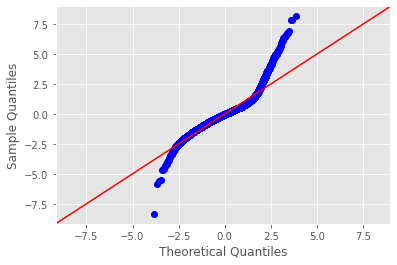

In [77]:

import statsmodels.stats.api as sms
import scipy.stats as stats
plt.style.use('ggplot')

model = model_results2
resid1 = model.resid
#resid2 = model2.resid
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)
#fig = sm.graphics.qqplot(resid2, dist=stats.norm, line='45', fit=True)


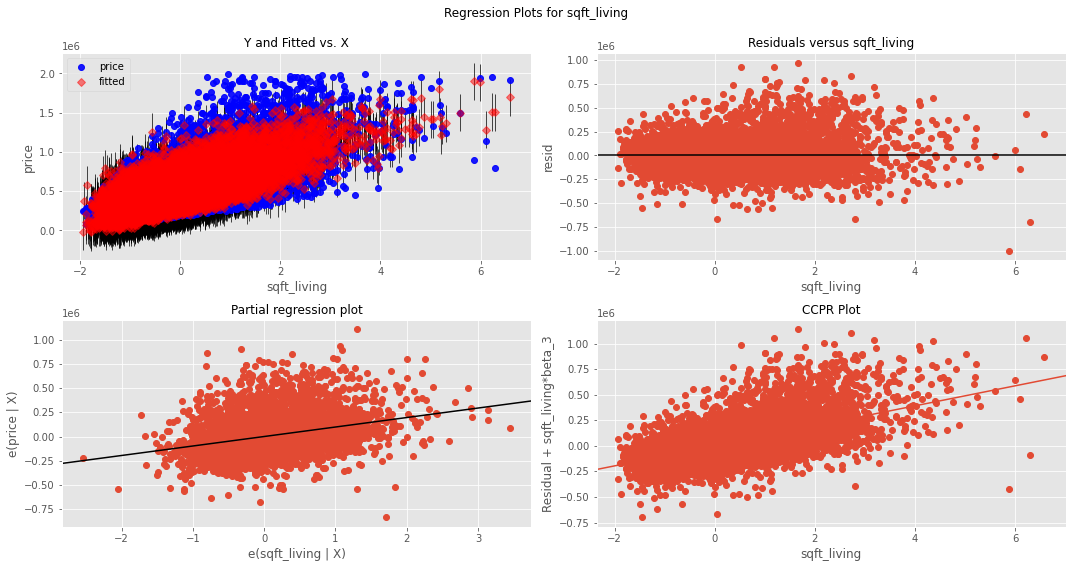

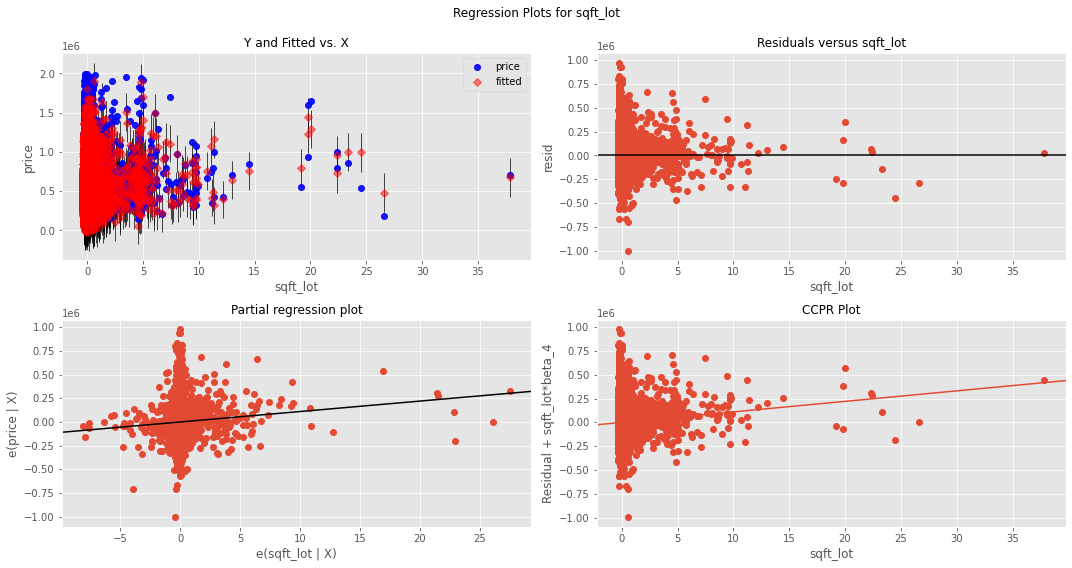

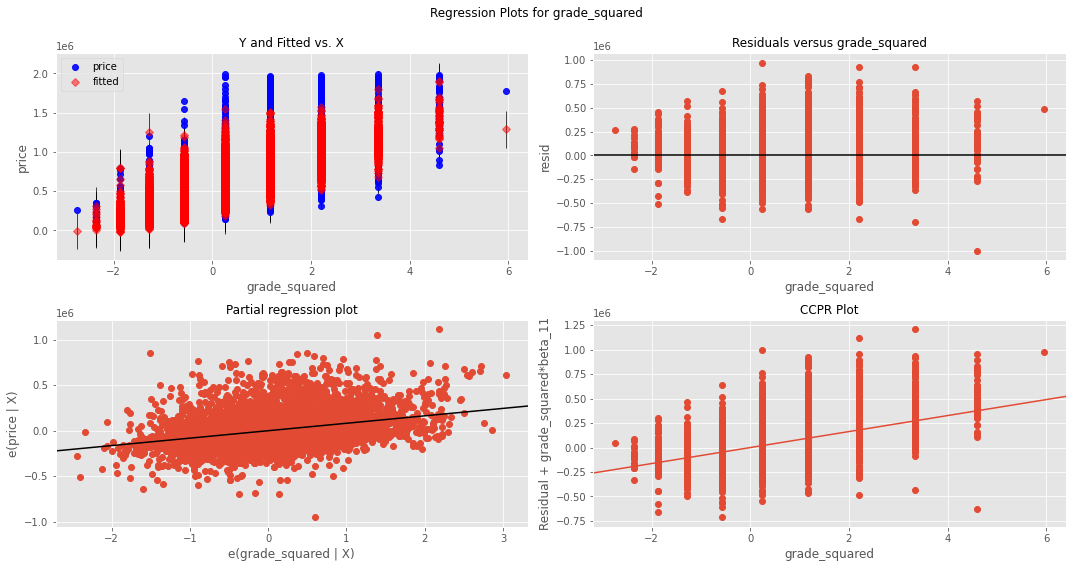

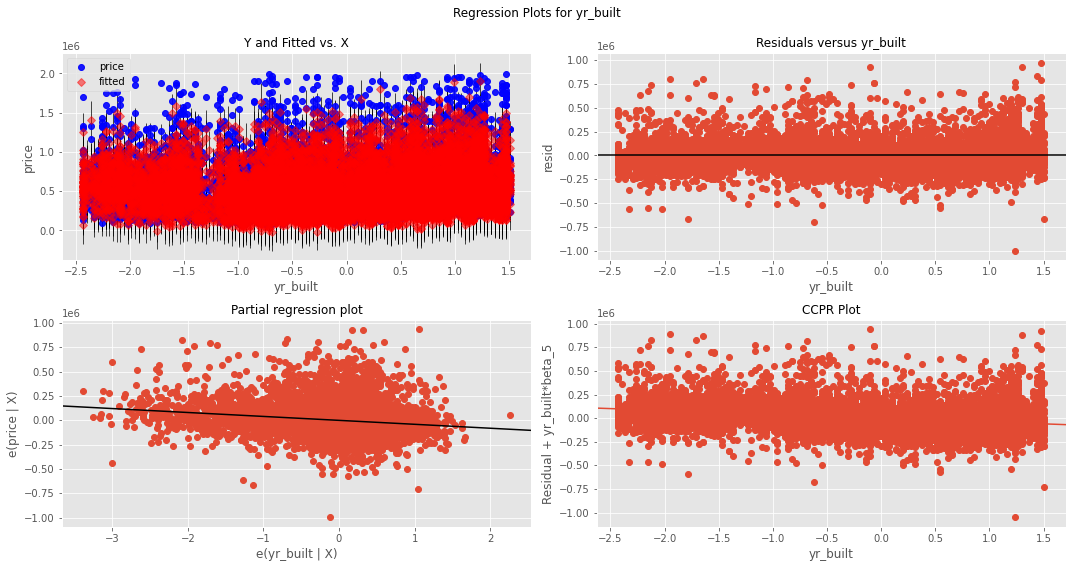

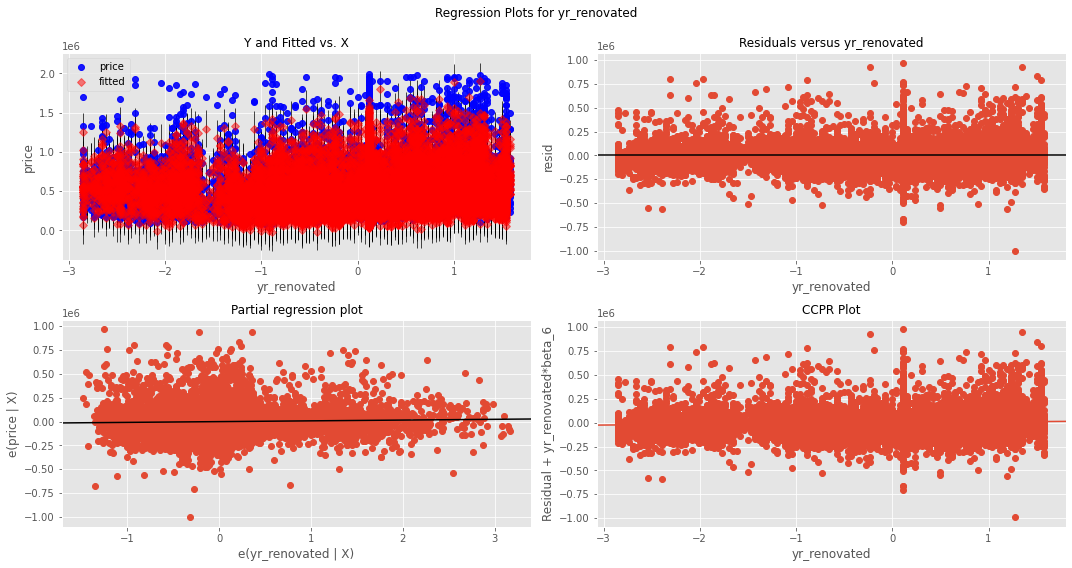

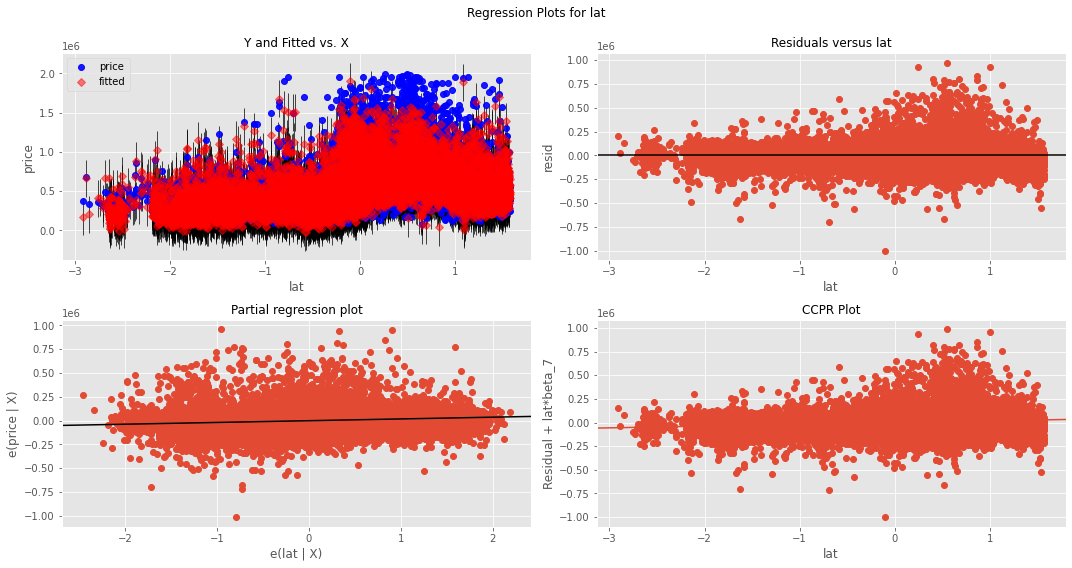

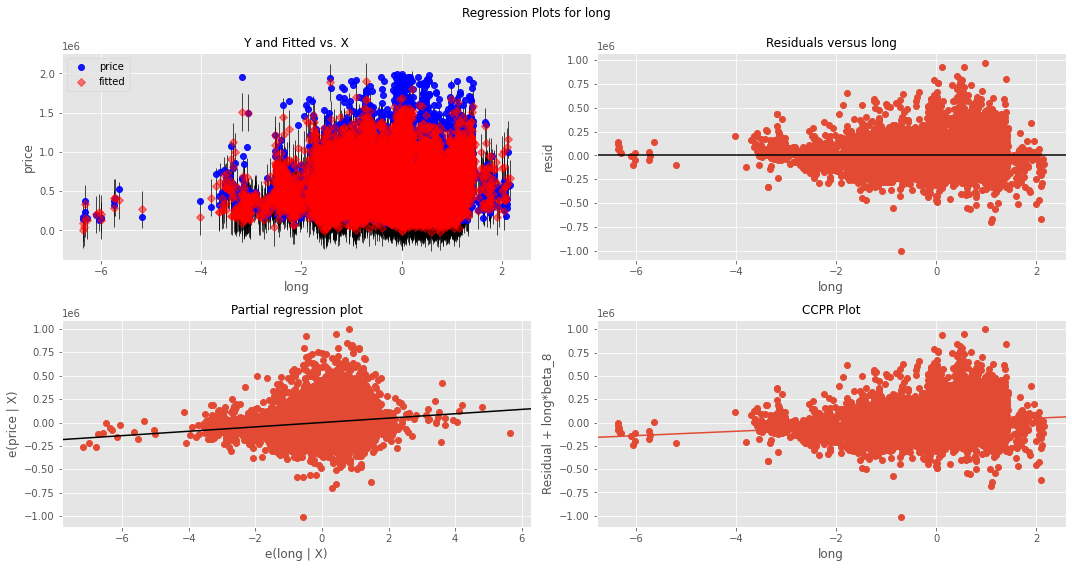

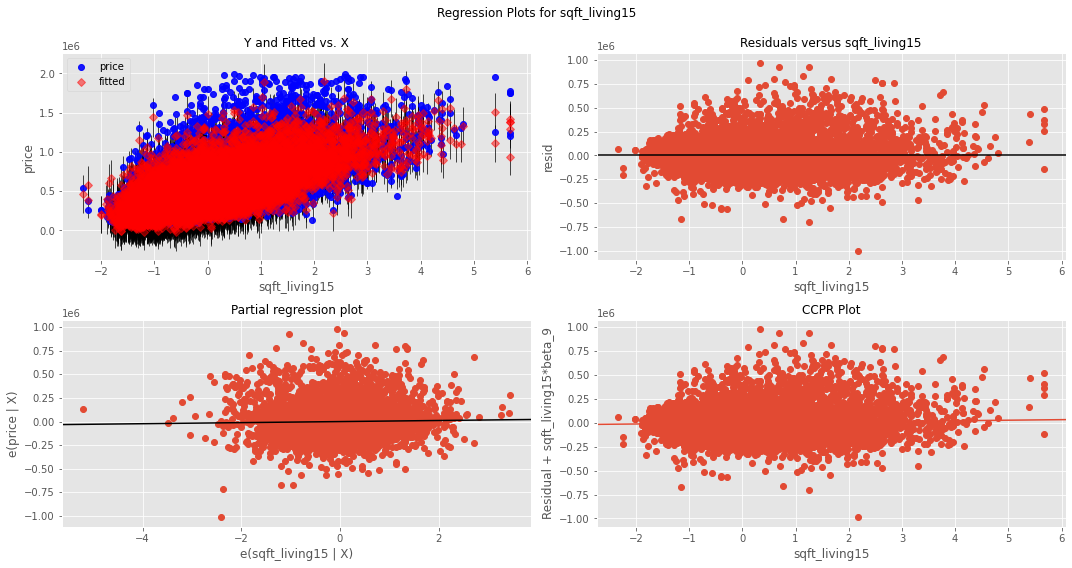

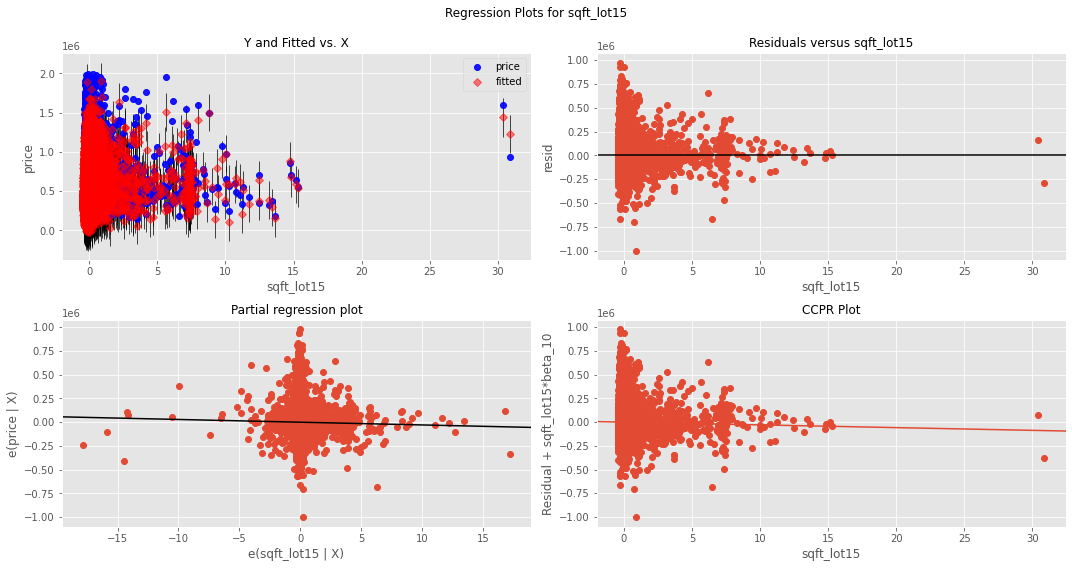

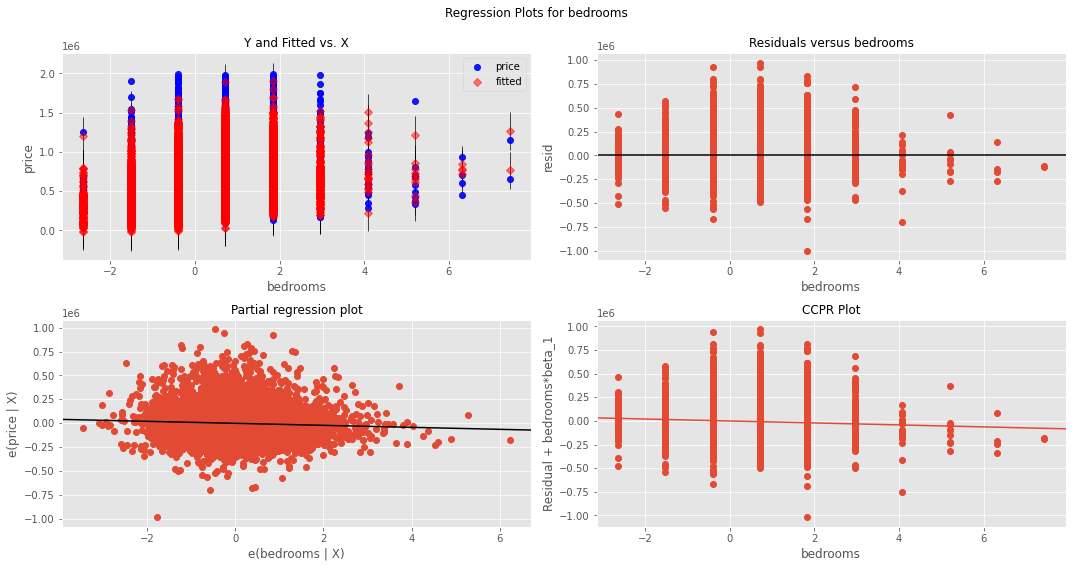

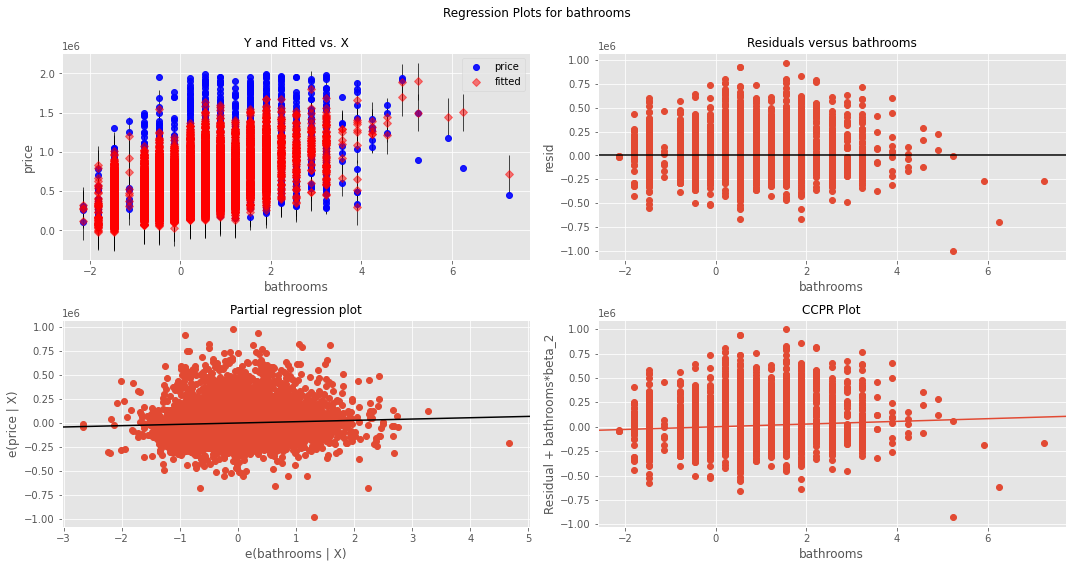

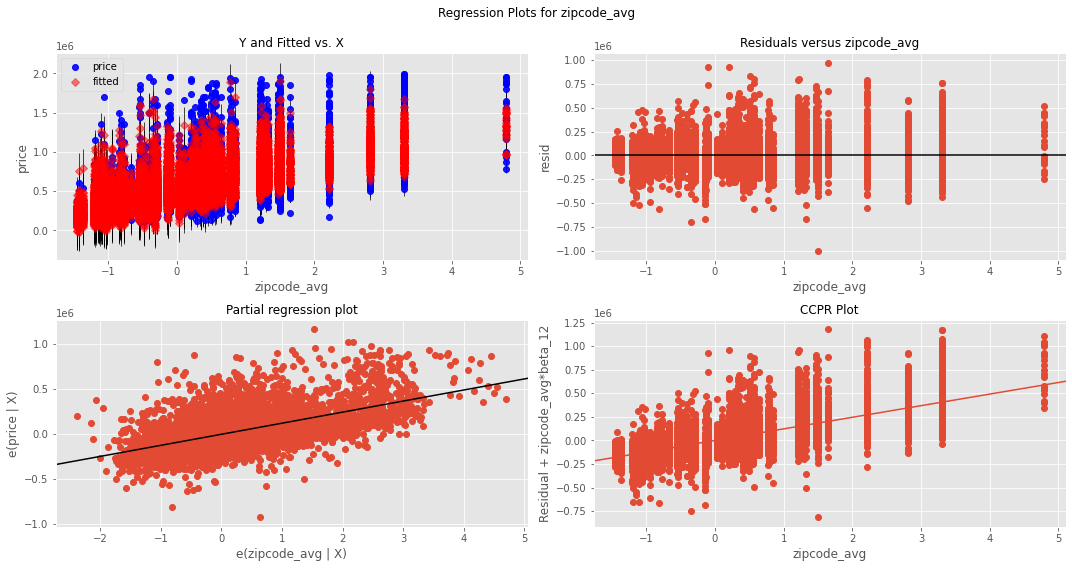

In [78]:
num_cols = [  'sqft_living', 'sqft_lot',
          'grade_squared',
       'yr_built', 'yr_renovated',  'lat', 'long',
       'sqft_living15', 'sqft_lot15',
            'bedrooms', 'bathrooms',
             'zipcode_avg',
            
       ]#'date',
#non_log_cols = ['sqft_basement, ']
#plan to move month/dayOfWeek to categorical eventually
#originally put bedrooms/bathrooms as categoricals...but moved back up to numeric
cat_cols = ['year', 'month', 'dayOfWeek','condition','floors', 'waterfront', 'view', 
            'waterfront_Missing', 'view_Missing','yr_renovated_Missing']


dropped_cols = ['id','day', 'date', 'zipcode', 'grade', 'sqft_basement', 'sqft_above']
missing_cols = ['waterfront', 'view','yr_renovated']

for col in num_cols:
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, col, fig=fig)
    plt.show()


In [79]:
# for col in X_train.columns:
#     plt.plot(model.resid)
#X_train.info()

In [80]:
#Lagrange Multiplier Heteroscedasticity Test by Breusch-Pagan
'''The tests the hypothesis that the residual variance does not depend on the variables in x in the form'''
num_cols = [  'sqft_living', 'sqft_lot',
       'yr_built', 'yr_renovated',  'lat', 'long',
       'sqft_living15', 'sqft_lot15',
            'bedrooms', 'bathrooms',
       ]
from statsmodels.stats.diagnostic import het_breuschpagan
'''lmfloat
lagrange multiplier statistic

lm_pvaluefloat
p-value of lagrange multiplier test

fvaluefloat
f-statistic of the hypothesis that the error variance does not depend on x

f_pvaluefloat
p-value for the f-statistic'''

(v1, v2, v3, v4) = het_breuschpagan(model.resid, model.model.exog, robust=True)
#model.resid
(v1, v2, v3, v4)

(2707.2585924507707, 0.0, 69.0891408107041, 0.0)

In [81]:
# import statsmodels.stats.api as sms
# num_cols = [  'sqft_living', 'sqft_lot',
#        'yr_built', 'yr_renovated',  'lat', 'long',
#        'sqft_living15', 'sqft_lot15',
#             'bedrooms', 'bathrooms',
 
#        ]

# #x_t1, y_t1

# for col in num_cols:
#     display(col)
#     lwr_thresh = X_train[col].quantile(q=.45)
#     upr_thresh = X_train[col].quantile(q=.55)
#     middle_10percent_indices = X_train[(X_train[col] >= lwr_thresh) & (X_train[col]<=upr_thresh)].index
#     display(len(middle_10percent_indices))

#     indices = [x-1 for x in X_train.index if x not in middle_10percent_indices]
#     plt.scatter(X_train[col].iloc[indices], model.resid.iloc[indices])
#     plt.xlabel(col)
#     plt.ylabel('Model Residuals')
#     plt.title("Residuals versus {} Feature".format(col))
#     plt.vlines(lwr_thresh, ymax=8, ymin=-8, linestyles='dashed',linewidth=2)
#     plt.vlines(upr_thresh, ymax=8, ymin=-8, linestyles='dashed',linewidth=2);
#     name = ['F statistic', 'p-value']
#     test = sms.het_goldfeldquandt(model.resid.iloc[indices], model.model.exog[indices])
#     list(zip(name, test))
# '''lwr_thresh = data.TV.quantile(q=.45)
# upr_thresh = data.TV.quantile(q=.55)
# middle_10percent_indices = data[(data.TV >= lwr_thresh) & (data.TV<=upr_thresh)].index
# # len(middle_10percent_indices)

# indices = [x-1 for x in data.index if x not in middle_10percent_indices]
# plt.scatter(data.TV.iloc[indices], model.resid.iloc[indices])
# plt.xlabel('TV')
# plt.ylabel('Model Residuals')
# plt.title("Residuals versus TV Feature")
# plt.vlines(lwr_thresh, ymax=8, ymin=-8, linestyles='dashed',linewidth=2)
# plt.vlines(upr_thresh, ymax=8, ymin=-8, linestyles='dashed',linewidth=2);'''
# # Run Goldfeld Quandt test
# # import statsmodels.stats.api as sms
# # name = ['F statistic', 'p-value']
# # test = sms.het_goldfeldquandt(model2.resid.iloc[indices], model2.model.exog[indices])
# # list(zip(name, test))

# Takeaways:
the categories that seem to be of consistently highest impact are sqft_living, grade_squared, zipcode_avg, waterfront, View, day of week (namely Saturday vs Sunday) 

1) I performed Exploratory Data Analysis to identify characteristics of the data  
2) I created several new features including grade squared, day of the week, month.  
2) I performed multiple linear regression (with one polynomial regression term) under several different permutations (e.g. logging numericals, scaling numericals, and different ways of classifying categoricals/numeric values  
4) I identified a model that had a good Score as well as minimal multicollinearity.  
5) I examined the necessary conditions of linear regression  
6) The business takeaways: sqft_living, grade_squared, zipcode_avg, waterfront, View, day of week (namely Saturday vs Sunday) all have a (normalized) significant impact on price.    
Furthermore, the model is ready to accept any new home predictors for comparison to current prices, in order to establish if a home is over- or under-valued.

# Visualizations again


Text(0.5, 1.0, 'Day of Week vs. Price')

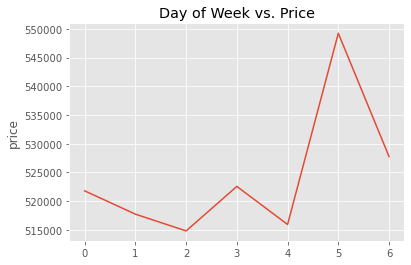

In [82]:
sns.lineplot(x=df['dayOfWeek'].unique(), y=df.groupby('dayOfWeek').mean()['price']).set_title('Day of Week vs. Price')

Text(0.5, 1.0, 'Month vs. Price')

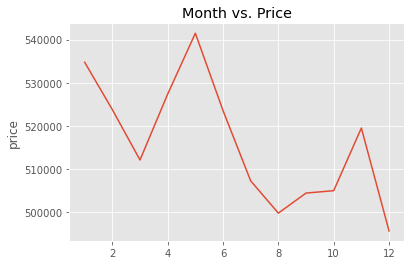

In [83]:
sns.lineplot(x=df['month'].unique(), y=df.groupby('month').mean()['price']).set_title('Month vs. Price')

In [84]:
# Neighborhood has a huge impact in house prices historically.  Though linear regression may be difficult to find this, 
# I found a nice visualization package for this.
import folium
from folium.plugins import HeatMap

price_map = folium.Map(location=[47.5,-122.3], 
                       tiles = "Stamen Terrain",
                      zoom_start = 9)
data_heatmap = df[['lat','long','price']]
data_heatmap = df.dropna(axis=0, subset=['lat','long','price'])
data_heatmap = [[row['lat'],row['long']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=10, 
        gradient = {.35: 'purple',.55: 'blue',.68:'yellow',.78:'red'}).add_to(price_map)
price_map

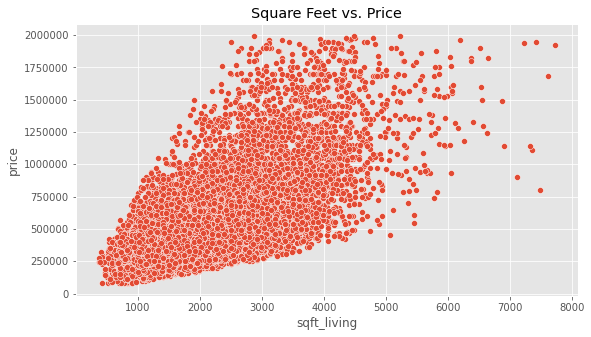

In [85]:
#A quick look at sqft vs price
plt.figure(figsize=(9, 5))
sns.scatterplot(x='sqft_living', y='price', data=df).set_title('Square Feet vs. Price')
plt.ticklabel_format(style='plain')#style='plain', 'sci', 'scientific'


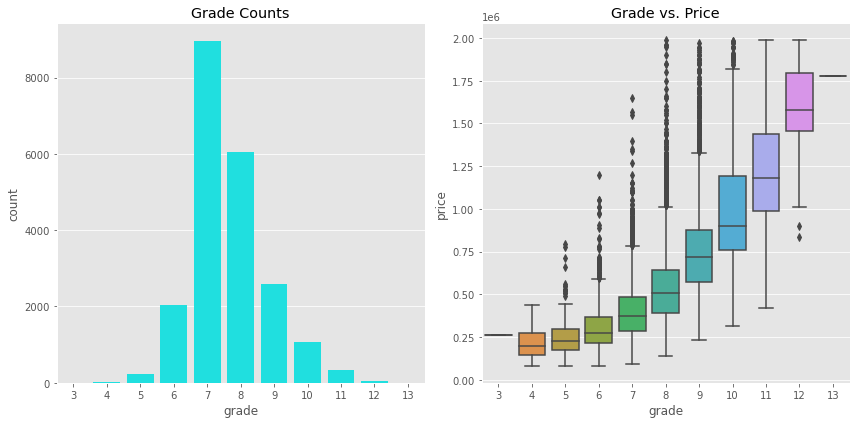

In [86]:
# grade vs price

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].set_title('Grade Counts')
sns.countplot(df['grade'], ax=axes[0], color='cyan')

axes[1].set_title('Grade vs. Price')
sns.boxplot(x='grade', y='price', data=df, ax=axes[1])

plt.tight_layout()


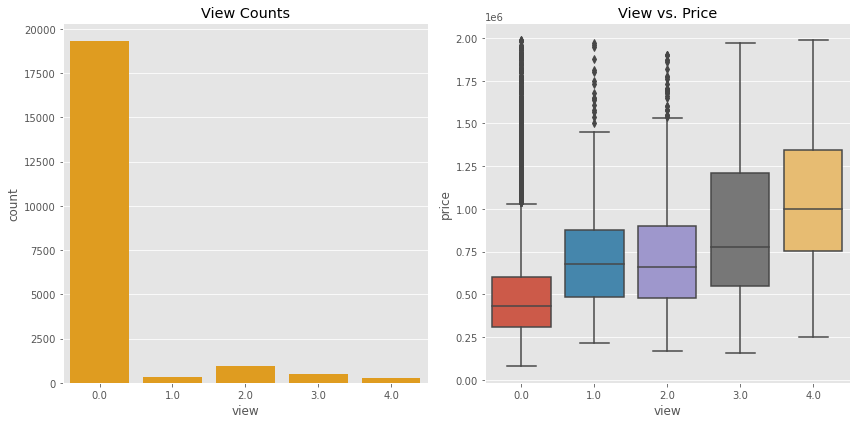

In [87]:
# View
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].set_title('View Counts')
sns.countplot(df['view'], ax=axes[0], color='orange')

axes[1].set_title('View vs. Price')
sns.boxplot(x='view', y='price', data=df, ax=axes[1])

plt.tight_layout()

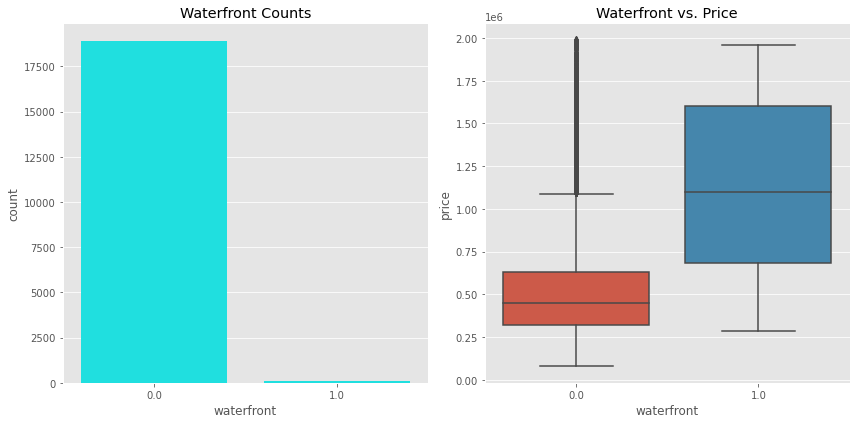

In [88]:
# Waterfront 
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].set_title('Waterfront Counts')
sns.countplot(df['waterfront'], ax=axes[0], color='cyan')

axes[1].set_title('Waterfront vs. Price')
sns.boxplot(x='waterfront', y='price', data=df, ax=axes[1])

plt.tight_layout()

In [89]:
#I wound up not using this for presentation
# #Exploring correlation and multicollinearity in the data

# #X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_state)

# heatmap_data = pd.concat([y_train, X_train], axis=1)
# # https://seaborn.pydata.org/generated/seaborn.jointplot.html
# #did corr matrix
# heatmap_data.corr()
# #used heatmap
# import seaborn as sns
# import numpy as np

# # Create a df with the target as the first column,
# # then compute the correlation matrix
# ##heatmap_data = pd.concat([y_train, X_train], axis=1)
# ##corr = heatmap_data.corr()
# corr = heatmap_data.corr()

# # Set up figure and axes
# fig, ax = plt.subplots(figsize=(10, 16))

# # Plot a heatmap of the correlation matrix, with both
# # numbers and colors indicating the correlations

# sns.heatmap(
#     # Specifies the data to be plotted
#     data=corr,
#     # The mask means we only show half the values,
#     # instead of showing duplicates. It's optional.
#     mask=np.triu(np.ones_like(corr, dtype=bool)),
#     # Specifies that we should use the existing axes
#     ax=ax,
#     # Specifies that we want labels, not just colors
#     annot=True,
#     # Customizes colorbar appearance
#     cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
# )

# # Customize the plot appearance
# ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [ ]:
#to update - add something about model to non-tech presentation -give R^2 and 
#top 5 most important features 
#Done!